## **이라크 데이터 파악**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_excel("/content/drive/MyDrive/LikeLion/Final-Project/terror_finalver(plz).xlsx")

In [4]:
df.shape

(173597, 19)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173597 entries, 0 to 173596
Data columns (total 19 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Unnamed: 0       173597 non-null  int64  
 1   eventid          173597 non-null  int64  
 2   iyear            173597 non-null  int64  
 3   imonth           173597 non-null  int64  
 4   iday             173597 non-null  int64  
 5   country_txt      173597 non-null  object 
 6   region_txt       173597 non-null  object 
 7   provstate        173597 non-null  object 
 8   latitude         173597 non-null  object 
 9   longitude        173597 non-null  object 
 10  city             173597 non-null  object 
 11  success          173597 non-null  int64  
 12  attacktype1_txt  173597 non-null  object 
 13  targtype1_txt    173597 non-null  object 
 14  weaptype1_txt    173597 non-null  object 
 15  nkill            173597 non-null  float64
 16  nwound           173597 non-null  int6

In [6]:
df_1990 = df.copy()

In [7]:
df_1990['total_victim'] = df_1990['nkill'] + df_1990['nwound']

In [8]:
# 이름을 간략히 변경
df_1990['weaptype1_txt'] = df_1990['weaptype1_txt'].replace(
    'Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)',
    'Vehicle'
)

In [9]:
# 중복 제거 전 행 수 확인
print(f"중복 제거 전: {df_1990.shape[0]} rows")

# 'eventid'와 'Unnamed: 0' 제외한 컬럼 기준으로 중복 제거
df_1990 = df_1990.drop_duplicates(subset=[col for col in df_1990.columns if col not in ['eventid', 'Unnamed: 0']])

# 중복 제거 후 행 수 확인
print(f"중복 제거 후: {df_1990.shape[0]} rows")

# 'Unnamed: 0' 컬럼 삭제
df_1990.drop(columns=['Unnamed: 0'], inplace=True, errors='ignore')

중복 제거 전: 173597 rows
중복 제거 후: 167685 rows


<ipython-input-9-b0304ca1e3f7>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1990.drop(columns=['Unnamed: 0'], inplace=True, errors='ignore')


### **각 지역별 상위 10개 국가**

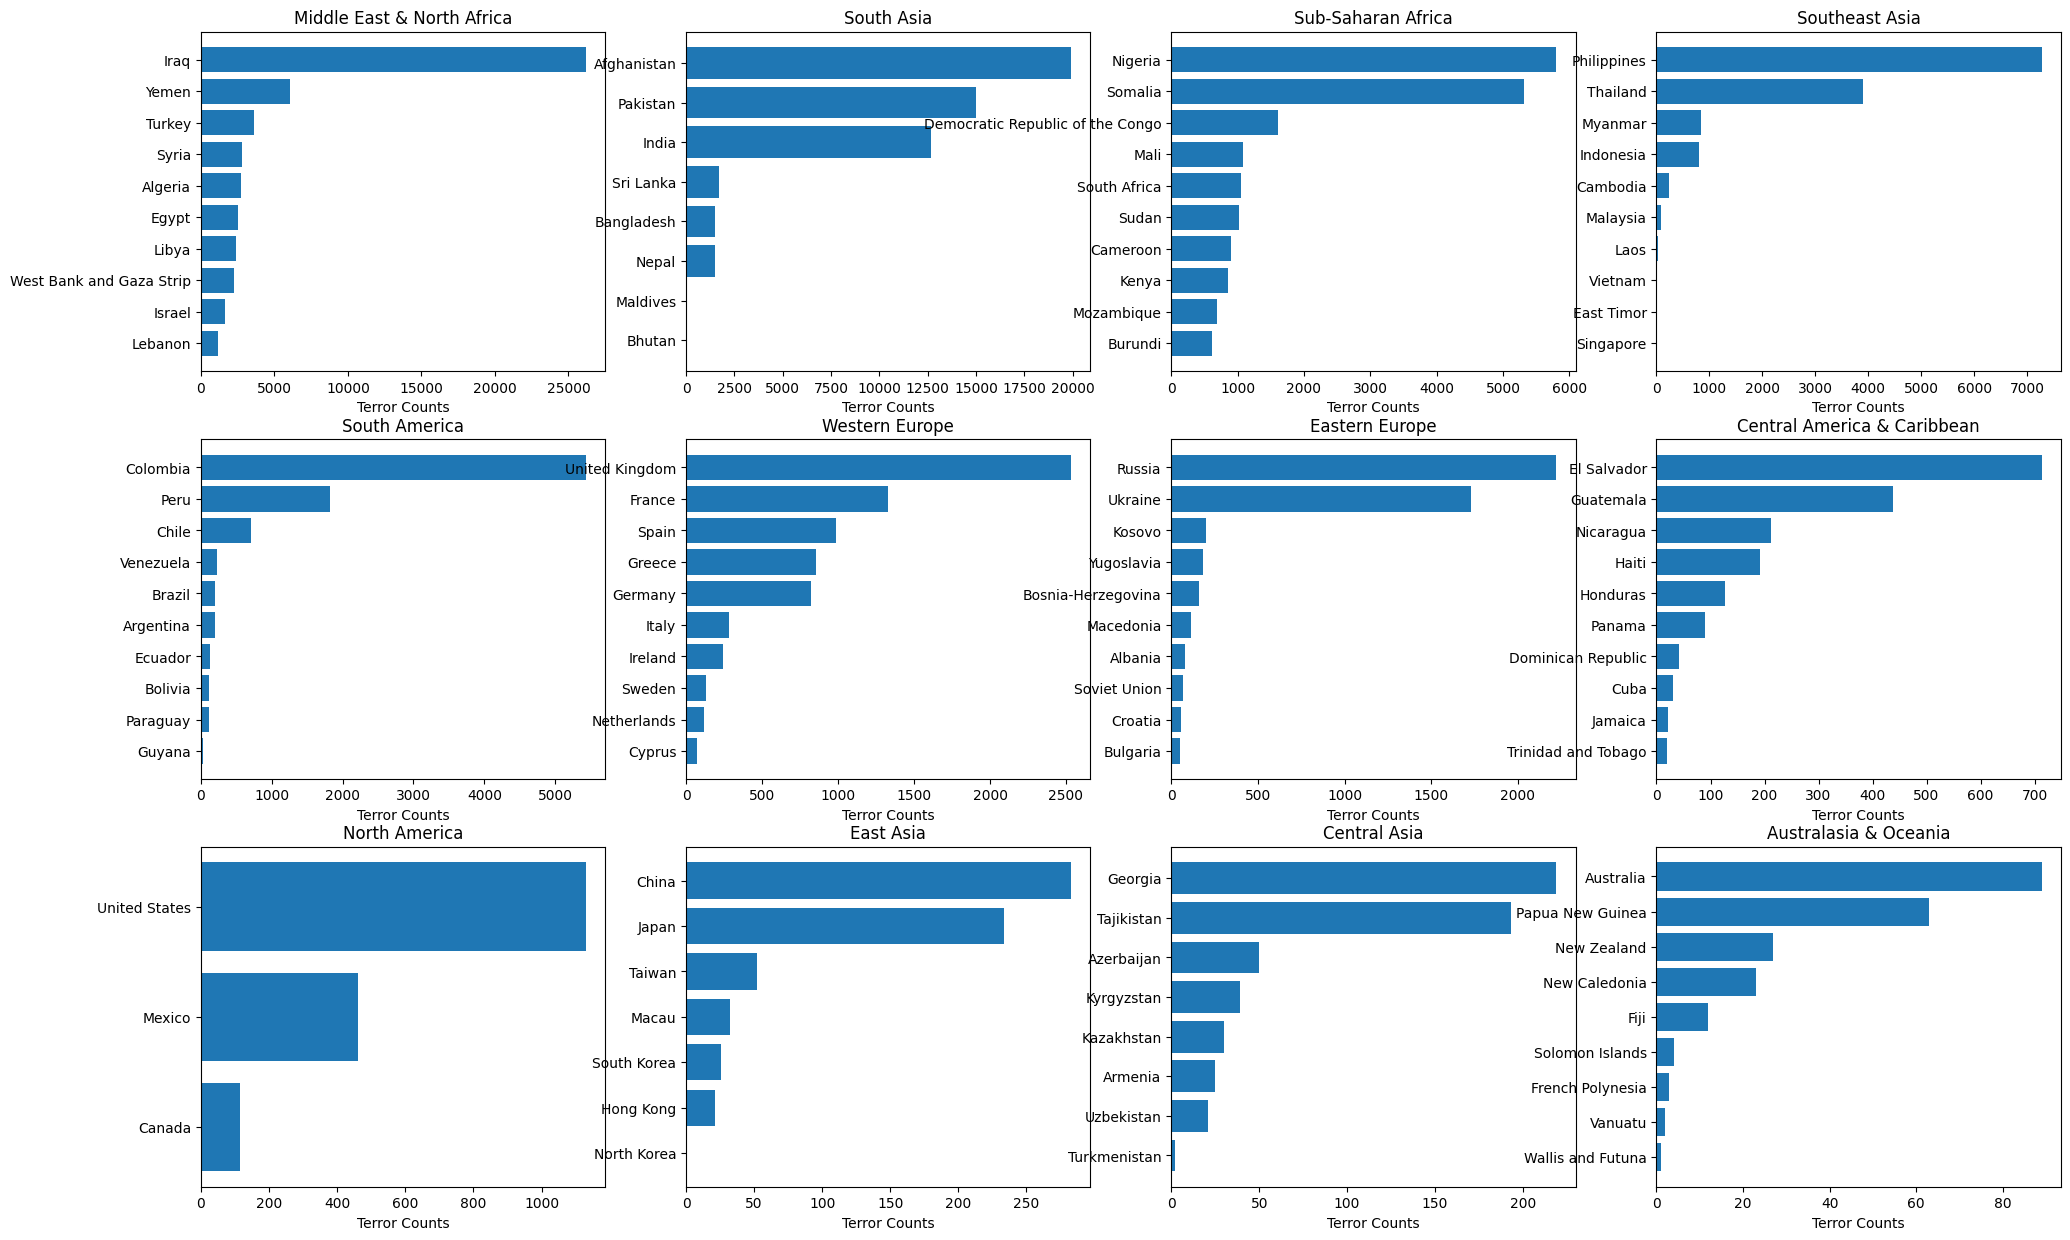

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# 지역별-국가별 테러 수 계산
region_country_counts = df_1990.groupby(["region_txt", "country_txt"]).size().reset_index(name="attack_count")

# 지역별 전체 테러 수 계산 후 상위 12개 지역 선택
top_regions = region_country_counts.groupby("region_txt")["attack_count"].sum().sort_values(ascending=False).head(12).index

# 서브플롯 설정 (3행 4열)
fig, axes = plt.subplots(3, 4, figsize=(24, 15))  # 전체 그래프 크기
axes = axes.flatten()  # 2차원 배열을 1차원으로 변환

# 각 subplot에 그래프 그리기
for i, region in enumerate(top_regions):
    # 해당 지역의 데이터 추출 및 상위 10개 국가 선택
    region_df = region_country_counts[region_country_counts["region_txt"] == region]
    top_countries = region_df.sort_values("attack_count", ascending=False).head(10)

    # 막대 그래프 그리기
    axes[i].barh(top_countries["country_txt"], top_countries["attack_count"])
    axes[i].set_title(f"{region}", fontsize=12)
    axes[i].set_xlabel("Terror Counts")
    axes[i].invert_yaxis()  # 큰 값이 위로 오도록
plt.show()

### **전체 테러 발생 건수 중 이라크의 위치**
- 테러 발생건수 1위

In [11]:
!pip install koreanize-matplotlib
import koreanize_matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 46.9 MB/s eta 0:00:00


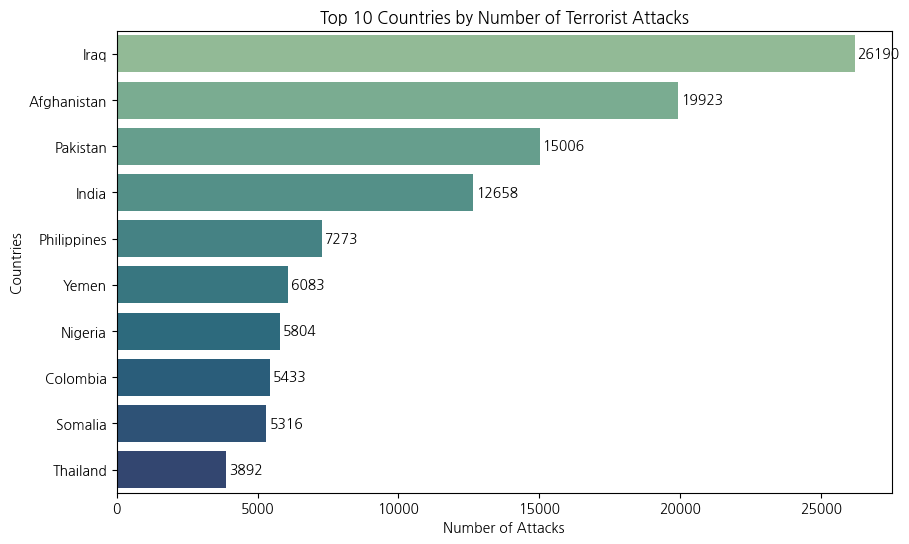

In [12]:
# Top 10 국가별 테러 발생 건수
top_countries = df_1990['country_txt'].value_counts().head(10)

# 그래프 생성
plt.figure(figsize=(10, 6))
ax = sns.barplot( x=top_countries.values, y=top_countries.index, hue=top_countries.index, palette='crest')

# 수치 표시
for i, value in enumerate(top_countries.values):
    ax.text(value + 100, i, str(value), va='center')

plt.title("Top 10 Countries by Number of Terrorist Attacks")
plt.xlabel("Number of Attacks")
plt.ylabel("Countries")
plt.show()

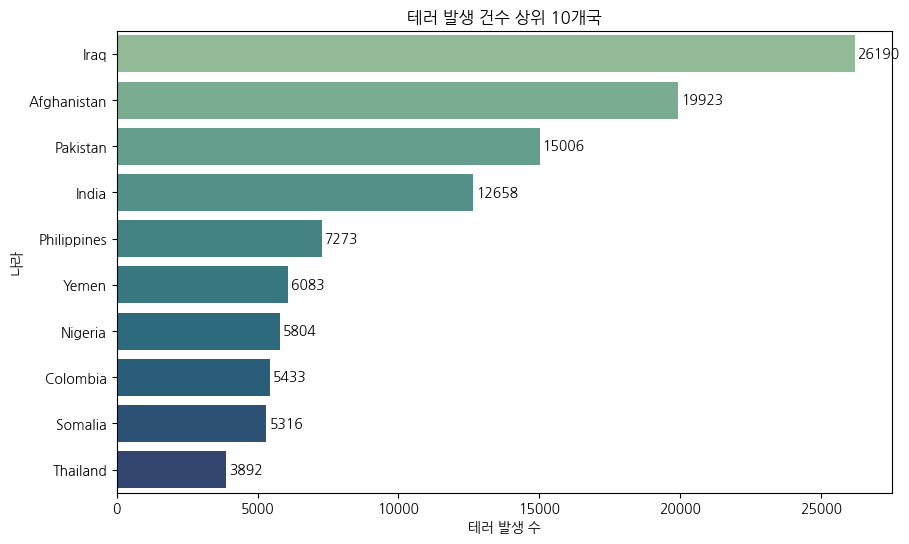

In [13]:
# Top 10 국가별 테러 발생 건수
top_countries = df_1990['country_txt'].value_counts().head(10)

# 그래프 생성
plt.figure(figsize=(10, 6))
ax = sns.barplot( x=top_countries.values, y=top_countries.index, hue=top_countries.index, palette='crest')

# 수치 표시
for i, value in enumerate(top_countries.values):
    ax.text(value + 100, i, str(value), va='center')

plt.title("테러 발생 건수 상위 10개국")
plt.xlabel("테러 발생 수")
plt.ylabel("나라")
plt.show()

In [14]:
# 국가별 총 테러 수
total_attacks = df_1990.groupby('country_txt')['success'].count()

# 국가별 성공한 테러 수
successful_attacks = df_1990[df_1990['success'] == 1].groupby('country_txt')['success'].count()

# 성공률 계산 (% 단위로 보기 위해 ×100)
success_rate = (successful_attacks / total_attacks) * 100

# 결측치 제거 후 상위 10개국 추출 (성공률이 높은 순)
top_countries_by_success_rate = success_rate.sort_values(ascending=False).head(50)


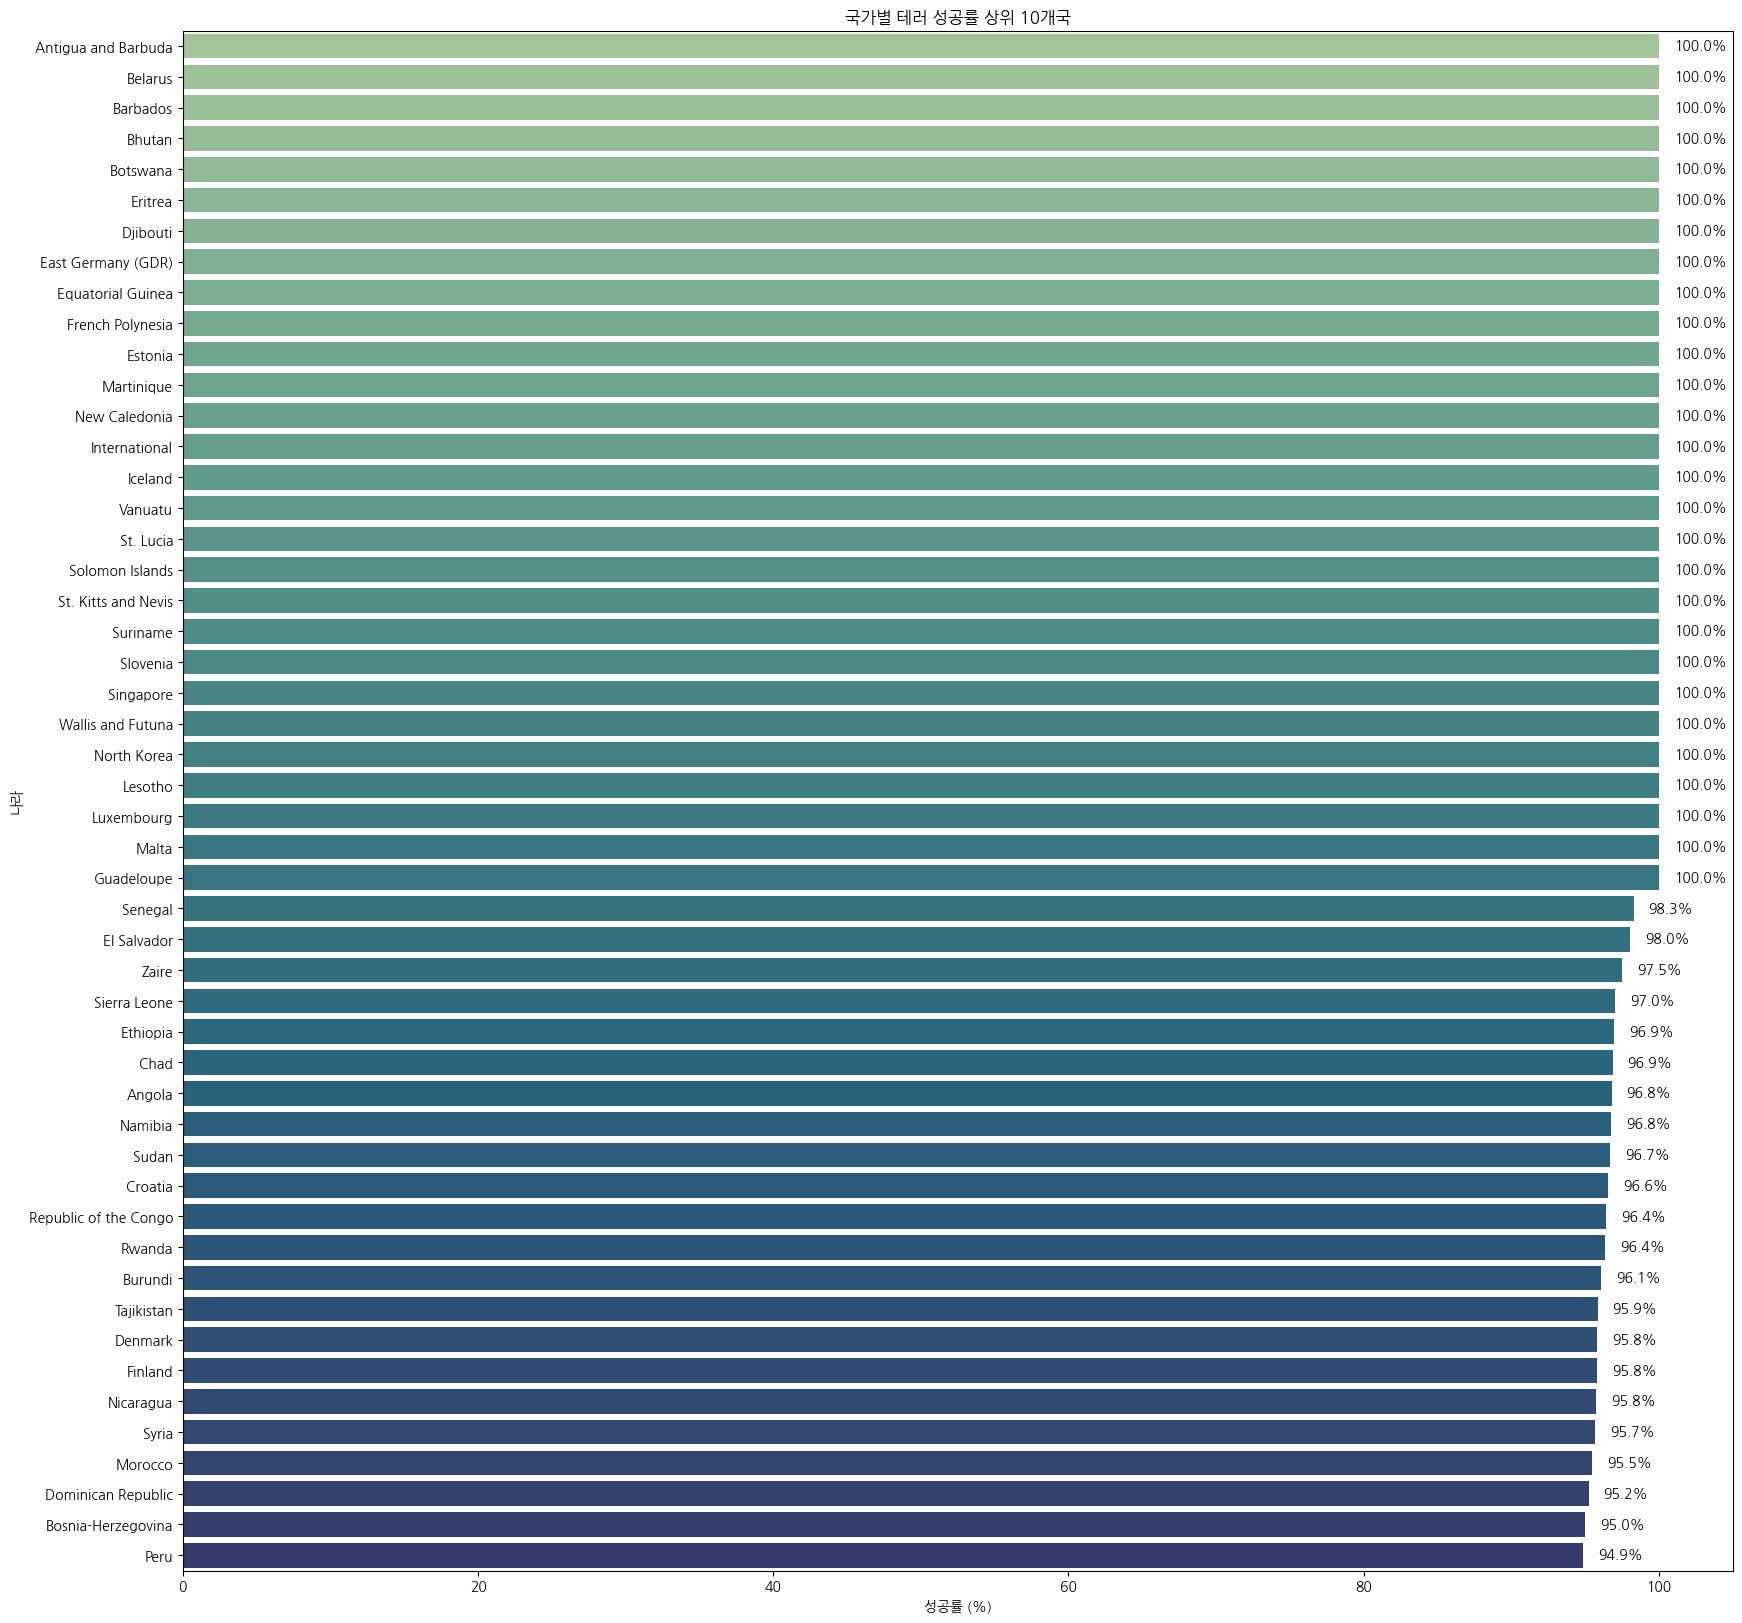

In [15]:
plt.figure(figsize=(20, 20))
ax = sns.barplot(
    x=top_countries_by_success_rate.values,
    y=top_countries_by_success_rate.index,
    hue=top_countries_by_success_rate.index,
    palette='crest'
)

# 수치 표시
for i, value in enumerate(top_countries_by_success_rate.values):
    ax.text(value + 1, i, f"{value:.1f}%", va='center')

plt.title("국가별 테러 성공률 상위 10개국")
plt.xlabel("성공률 (%)")
plt.ylabel("나라")
plt.legend([],[], frameon=False)  # 범례 제거
plt.show()


In [16]:
# 결측치 제거 및 정렬
success_rate_sorted = success_rate.dropna().sort_values(ascending=False)

# 이라크의 성공률과 순위
iraq_success_rate = success_rate_sorted['Iraq']
iraq_rank = success_rate_sorted.index.get_loc('Iraq') + 1  # 인덱스는 0부터 시작하므로 +1

print(f"이라크의 테러 성공률: {iraq_success_rate:.2f}%")
print(f"이라크의 성공률 순위: {iraq_rank}위 / 총 {len(success_rate_sorted)}개 국가")


이라크의 테러 성공률: 89.76%
이라크의 성공률 순위: 87위 / 총 192개 국가


### **전체 국가 중 이라크가 차지하는 테러 발생 건수 비율**

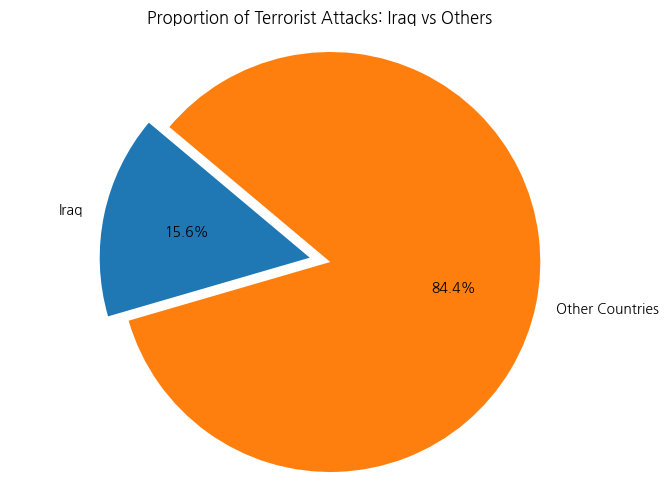

In [17]:
import matplotlib.pyplot as plt

# 전체 테러 수
total_attacks = len(df_1990)

# 이라크 테러 수
iraq_attacks = len(df_1990[df_1990["country_txt"] == "Iraq"])

# 기타 국가 테러 수
other_attacks = total_attacks - iraq_attacks

# 데이터 구성
labels = ['Iraq', 'Other Countries']
sizes = [iraq_attacks, other_attacks]
explode = (0.1, 0)  # 이라크 비율 강조

# 파이 차트 그리기
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, explode=explode)
plt.title('Proportion of Terrorist Attacks: Iraq vs Others')
plt.axis('equal')
plt.show()


## **연도별 기준 이라크 테러 시각화**


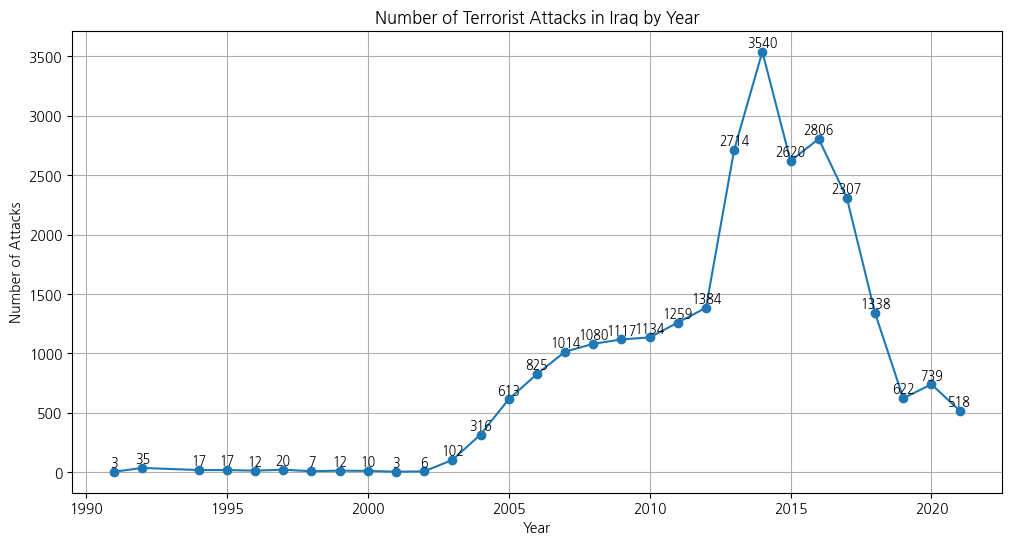

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# 이라크 데이터 필터링
iraq_df = df_1990[df_1990["country_txt"] == "Iraq"]

# 연도별 테러 발생 수 집계
iraq_yearly_counts = iraq_df["iyear"].value_counts().sort_index()

# 선 그래프 시각화
plt.figure(figsize=(12, 6))
plt.plot(iraq_yearly_counts.index, iraq_yearly_counts.values, marker='o', linestyle='-')
plt.title("Number of Terrorist Attacks in Iraq by Year")
plt.xlabel("Year")
plt.ylabel("Number of Attacks")
plt.grid(True)

# 수치(label) 표시 - 더 높게 (y + 20)
for x, y in zip(iraq_yearly_counts.index, iraq_yearly_counts.values):
    plt.text(x, y + 20, str(y), ha='center', va='bottom', fontsize=9)
plt.show()

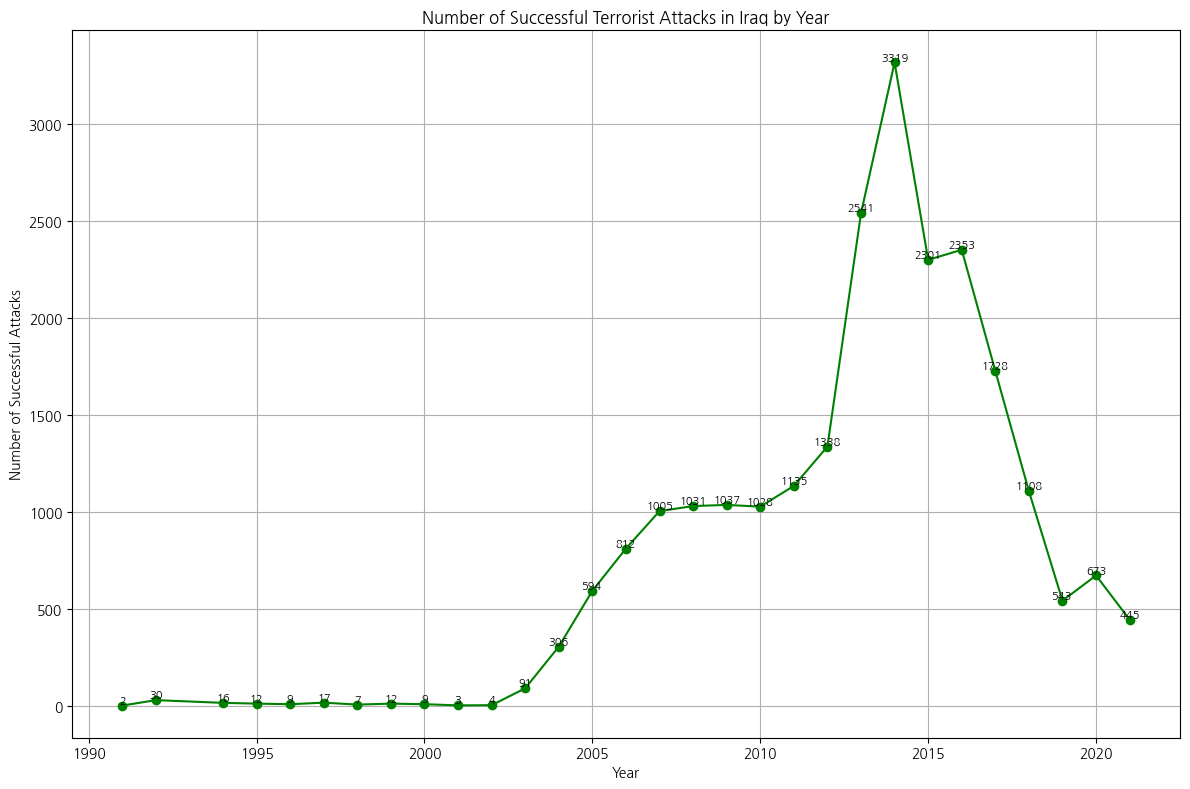

In [19]:
# 이라크 데이터 필터링
iraq_df = df_1990[df_1990["country_txt"] == "Iraq"]

# 연도별 성공한 사건 수 집계
success_count_by_year = iraq_df.groupby("iyear")["success"].sum().reset_index()
success_count_by_year.rename(columns={"success": "success_count"}, inplace=True)

# 선 그래프
plt.figure(figsize=(12, 8))
plt.plot(success_count_by_year["iyear"], success_count_by_year["success_count"], marker='o', color='green')
plt.title("Number of Successful Terrorist Attacks in Iraq by Year")
plt.xlabel("Year")
plt.ylabel("Number of Successful Attacks")
plt.grid(True)

# 수치 표시
for x, y in zip(success_count_by_year["iyear"], success_count_by_year["success_count"]):
    plt.text(x, y+10, str(int(y)), ha='center', fontsize=8)

plt.tight_layout()
plt.show()


### **이라크 성공 여부 파악**
- 발생 건수 -> 막대 그래프
- 발생 건수 비율 - 파이 차트

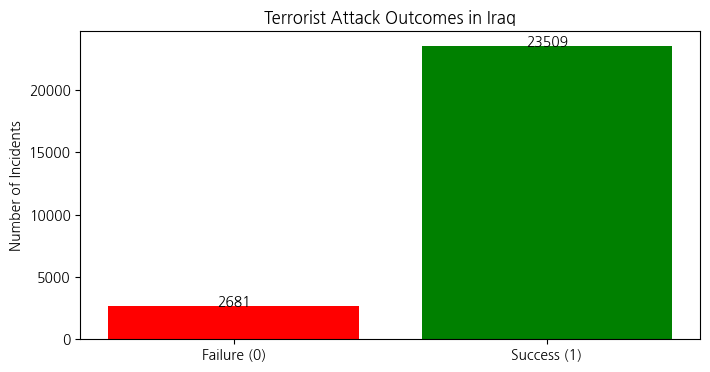

In [20]:
# 이라크 데이터 필터링
iraq_df = df_1990[df_1990["country_txt"] == "Iraq"]

# 성공(1) vs 실패(0) 개수 세기
success_counts = iraq_df["success"].value_counts().sort_index()  # 0: 실패, 1: 성공

# 막대그래프
plt.figure(figsize=(8, 4))
plt.bar(['Failure (0)', 'Success (1)'], success_counts.values, color=['red', 'green'])
plt.title("Terrorist Attack Outcomes in Iraq")
plt.ylabel("Number of Incidents")
for i, count in enumerate(success_counts.values):
    plt.text(i, count + 20, str(count), ha='center', fontsize=10)
plt.show()

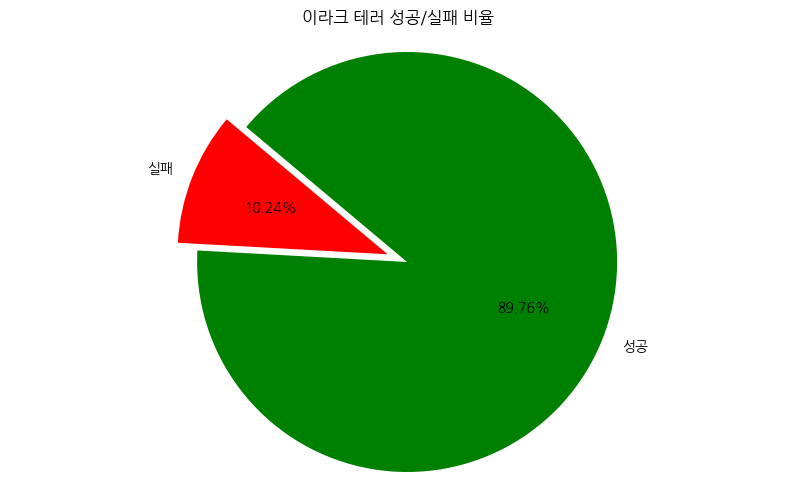

In [21]:
explode = (0, 0.1)

# 파이차트 생성
plt.figure(figsize=(10, 6))
plt.pie(success_counts,
        labels=['실패', '성공'],
        autopct='%1.2f%%',
        colors=['red', 'green'],
        startangle=140,
        explode=explode)
plt.title("이라크 테러 성공/실패 비율")
plt.axis('equal')
plt.show()

### **연도별 이라크 테러 발생 추이**
- success(1) = 성공 : green
- success(0) = 실패 : red

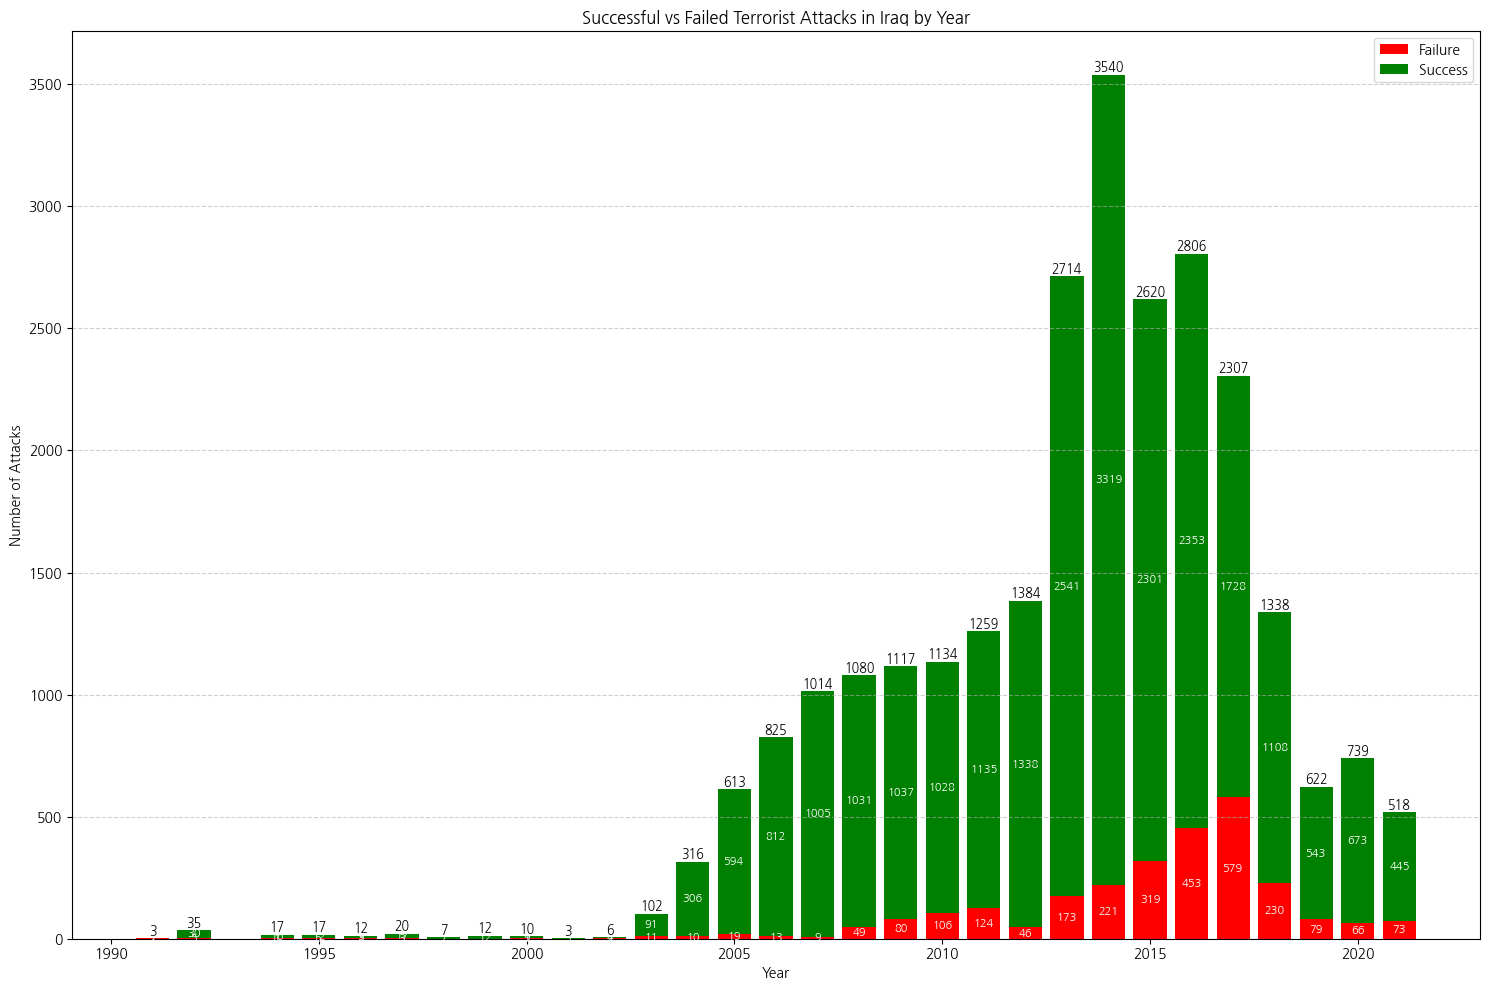

In [22]:
# 이라크 테러 데이터 필터링
iraq_df = df_1990[df_1990["country_txt"] == "Iraq"]

# 연도별 성공(1), 실패(0) 건수 집계
success_failure_by_year = iraq_df.groupby(["iyear", "success"]).size().unstack(fill_value=0)
success_failure_by_year.columns = ['Failure', 'Success']  # success=0 → Failure, success=1 → Success

# 누적 막대그래프
plt.figure(figsize=(15, 10))
plt.bar(success_failure_by_year.index, success_failure_by_year['Failure'], color='red', label='Failure')
plt.bar(success_failure_by_year.index, success_failure_by_year['Success'],
        bottom=success_failure_by_year['Failure'], color='green', label='Success')

# 수치 라벨링
for year in success_failure_by_year.index:
    fail = success_failure_by_year.loc[year, 'Failure']
    succ = success_failure_by_year.loc[year, 'Success']
    total = fail + succ

    # 실패 수치를 빨간 막대 안에 표시 (중앙)
    if fail > 0:
        plt.text(year, fail / 2, str(int(fail)), ha='center', va='center', fontsize=8, color='white')

    # 성공 수치를 초록 막대 안에 표시 (성공 막대 중앙)
    if succ > 0:
        plt.text(year, fail + succ / 2, str(int(succ)), ha='center', va='center', fontsize=8, color='white')

    # 전체 수치를 막대 위에 표시
    plt.text(year, total + 2, str(int(total)), ha='center', va='bottom', fontsize=9, color='black')

# 제목 및 스타일
plt.title("Successful vs Failed Terrorist Attacks in Iraq by Year")
plt.xlabel("Year")
plt.ylabel("Number of Attacks")
plt.legend()
plt.grid(True, axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

### **기존 도출**
1. 2003~2005 상승 (이라크)
- 2011 9.11 테러 발생 -> 2003년 이라크 전쟁 발발

<br>

2. 2011~2014 상승 (이라크)
- 2011 이라크 전쟁 종전 이후(미국 철군), 이라크 종교적 갈등 심화
- 2013년 이후 시리아 내전 발발, ISIS가 생기고 이라크 서부 지역을 장악하면서 폭력 사태가 가속화




### **연도별 이라크 테러 성공률 추이**

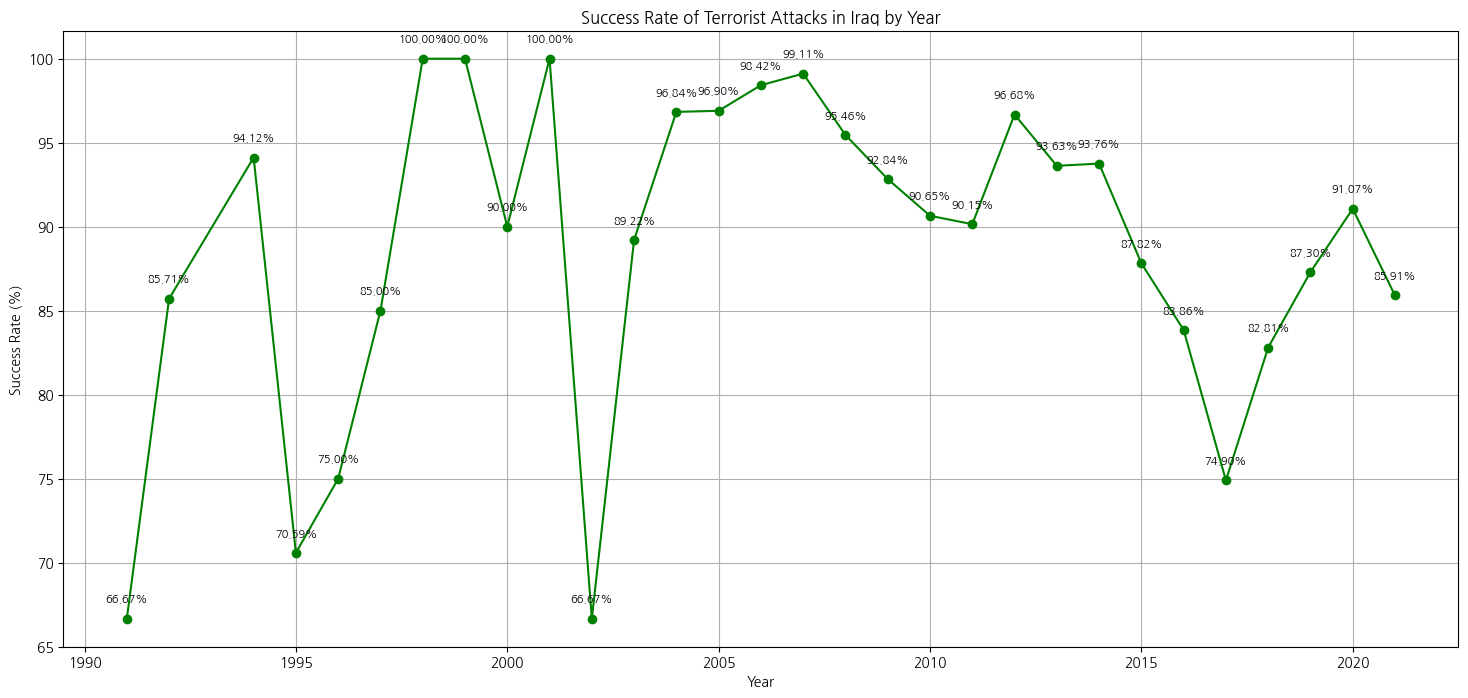

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# 이라크 필터링
iraq_df = df_1990[df_1990["country_txt"] == "Iraq"]

# 연도별 성공률 계산
success_by_year = iraq_df.groupby("iyear")["success"].mean().reset_index()
success_by_year["success_rate"] = success_by_year["success"] * 100

# 선 그래프
plt.figure(figsize=(18, 8))
plt.plot(success_by_year["iyear"], success_by_year["success_rate"], marker='o', color='green')
plt.title("Success Rate of Terrorist Attacks in Iraq by Year")
plt.xlabel("Year")
plt.ylabel("Success Rate (%)")
plt.grid(True)

# 수치 표시
for x, y in zip(success_by_year["iyear"], success_by_year["success_rate"]):
    plt.text(x, y + 1, f"{y:.2f}%", ha='center', fontsize=8)
plt.show()

### 해석!
- 성공률이 100% 가 되는 연도 :  1998,1999,2001년
- 테러 건수로 봤을 때,
  - 1998년 = 7건
  - 1999년 = 12건
  - 2001년 = 3건

- 2002년 이후로 성공률이 제일 낮은 연도 : 2017년
  - 그 이유는?

## **연도별 기준 이라크 추론통계**



### **가설(1)**
- 귀무가설 H₀: 이라크에서 연도별 테러 발생 수의 평균에는 유의미한 차이가 없다.
- 대립가설 H₁: 이라크에서 연도별 테러 발생 수의 평균에는 유의미한 차이가 있다.

### **선형 회귀 분석**

In [24]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm


iraq_df = df_1990[df_1990["country_txt"] == "Iraq"]
yearly_counts = iraq_df["iyear"].value_counts().sort_index()
X = yearly_counts.index.values.reshape(-1, 1)  # 연도
y = yearly_counts.values  # 연도별 발생 건수

# 선형 회귀 모델 적합
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

# 회귀 계수 및 R^2 출력
slope = model.coef_[0]
intercept = model.intercept_
r2 = model.score(X, y)

print(f"기울기(slope): {slope:.3f}")
print(f"절편(intercept): {intercept:.3f}")
print(f"R^2 score: {r2:.3f}")

기울기(slope): 77.163
절편(intercept): -153948.538
R^2 score: 0.466


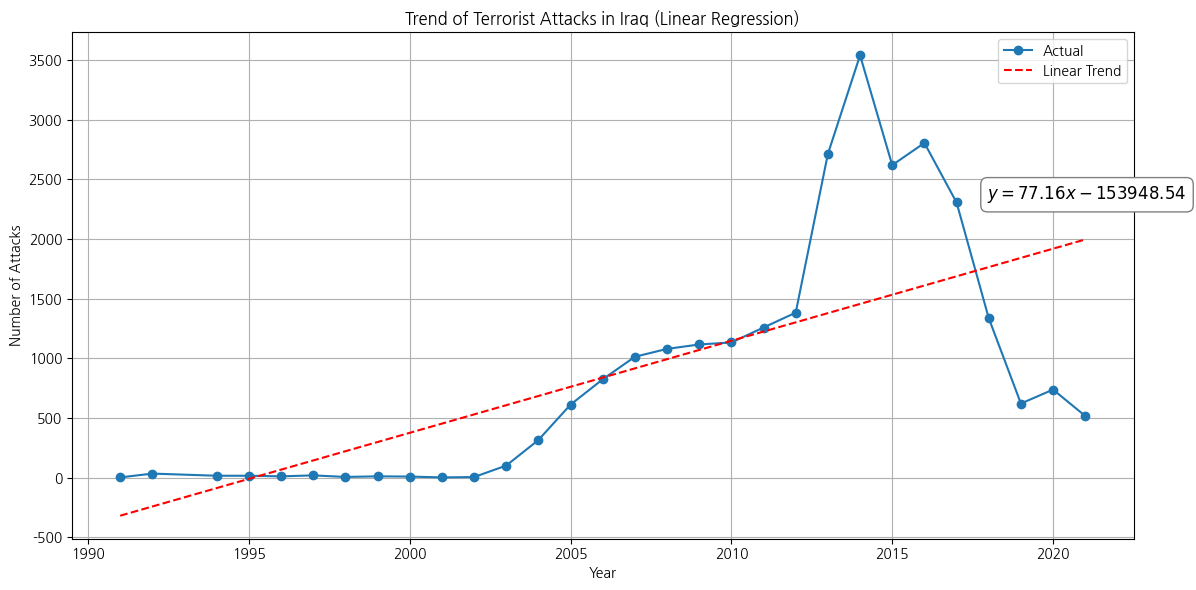

In [25]:
import matplotlib.pyplot as plt

# 회귀식 문자열 구성 (소수점 2자리까지)
eq_text = f"$y = {slope:.2f}x {intercept:+.2f}$"

# 시각화
plt.figure(figsize=(12, 6))
plt.plot(X, y, label='Actual', marker='o')
plt.plot(X, y_pred, label='Linear Trend', color='red', linestyle='--')

# 회귀식 박스 추가 (우측 상단)
plt.text(1.05, 0.7, eq_text,
         transform=plt.gca().transAxes,
         fontsize=12, verticalalignment='top', horizontalalignment='right',
         bbox=dict(boxstyle='round,pad=0.4', facecolor='white', edgecolor='gray'))

# 나머지 요소
plt.title("Trend of Terrorist Attacks in Iraq (Linear Regression)")
plt.xlabel("Year")
plt.ylabel("Number of Attacks")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [26]:
# statsmodels용 데이터셋 구성
X = sm.add_constant(X)  # 절편 추가
model = sm.OLS(y, X).fit()  # OLS 회귀
p_value = model.pvalues[1]

# 결과 요약
print(f"p-value: {p_value:.4f}")

p-value: 0.0000


### **해석!**
1. 기울기(slope = 77.163)
  - 시간이 1년 증가할 때마다, 이라크 내 테러 발생 수는 평균적으로 약 77건씩 증가하는 경향이 있다.
  - 즉, 연도에 따라 테러가 증가하는 추세가 존재.

2. 결정계수 R² = 0.466
  - 이 회귀 모델은 이라크 내 연도별 테러 발생 수의 약 46.6%를 설명.
  - 나머지 53.4%는 다른 요인에 의해 설명될 수 있다.

3. 기울기 p-value = 0.0000
  -  p-value가 0.05보다 훨씬 작음 → 기울기가 통계적으로 유의미하다는 것을 의미
  - "시간이 흐를수록 테러가 증가한다"는 경향은 우연이 아니라 실제로 존재하는 추세라고 볼 수 있다.



### **Mann-Kendall 추세 검정 (비모수적 방식)**

1. 정의
  - Mann-Kendall 검정은 시계열 데이터가 **통계적으로 유의미한 추세(증가 또는 감소)**를 가지고 있는지 판단하는 비모수 추론통계 방법

2. 특징
  - 정규성 가정 불필요 (비모수)
  - 검정 대상 : 단조 증가/감소 여부
  - 단순히 시간 흐름에 따른 경향성(↑↓)만 판단하고 싶을 때

3. z-score
  - Z-통계량 :  관측된 비율과 기대 비율의 차이가 표준 오차(불확실성) 대비 얼마나 큰지를 나타내는 값

In [27]:
!pip install pymannkendall

In [28]:
import pymannkendall as mk

# 연도별 테러 건수 계산
iraq_df = df_1990[df_1990["country_txt"] == "Iraq"]
yearly_counts = iraq_df["iyear"].value_counts().sort_index()

# Mann-Kendall 추세 검정
result = mk.original_test(yearly_counts.values)

# 결과 출력
print("Mann-Kendall Trend Test 결과:")
print(f"Trend: {result.trend}")  # increasing / decreasing / no trend
print(f"p-value: {result.p:.3f}")
print(f"Z-statistic: {result.z:.3f}")

Mann-Kendall Trend Test 결과:
Trend: increasing
p-value: 0.000
Z-statistic: 4.409


### **해석!**
- Trend(추세방향) : increasing → 데이터가 단조 증가하는 경향
- p-value(유의수준) : 0.000 → 귀무가설 기각
- Z score : 4.441 → 크기가 클수록 유의성이 높음

### **가설(1)**
- 귀무가설 H₀: 연도에 따라 이라크 내 테러 성공률(success 비율)은 차이가 없다.
- 대립가설 H₁: 연도에 따라 이라크 내 테러 성공률에는 유의미한 차이가 있다.
- **분석 목적** : 이라크에서 테러가 점점 더 성공적으로 실행되고 있는가?

### **로지스틱 회귀 분석**
1. 정의
- 로지스틱 회귀, 포아송 회귀 등 비선형 모델에서는 잔차 제곱합이 정의되지 않기 때문에 R²를 사용할 수 없다.
- 그래서 대신 사용하는 대체 지표가 pseudo R²
2. 해석
- 일반적으로 0.2~0.4면 괜찮은 모델로 간주된다.
- 0.4 이상은 매우 우수한 모델로 평가되기도 함
- R²처럼 직접적인 설명력 해석은 어렵고, 상대적 성능 비교 지표로 이해하는 것이 정확



In [29]:
import statsmodels.api as sm

# 독립변수 및 종속변수 설정
X = sm.add_constant(iraq_df["iyear"])
y = iraq_df["success"]

# 로지스틱 회귀 모델 적합
logit_model = sm.Logit(y, X).fit()

# 주요 변수 추출
coef = logit_model.params["iyear"]
p_value = logit_model.pvalues["iyear"]
pseudo_r2 = logit_model.prsquared  # Pseudo R² (설명력 대체 지표)

# 요약 출력
print(f"기울기(slope): {coef:.4f}")
print(f"p-value: {p_value:.4f}")
print(f"Pseudo R²: {pseudo_r2:.3f}")

Optimization terminated successfully.
         Current function value: 0.319773
         Iterations 7
기울기(slope): -0.1279
p-value: 0.0000
Pseudo R²: 0.032


### **해석!**
1. **기울기 (slope = -0.1279)**
- iyear의 회귀계수가 음수 → 연도가 증가할수록 테러 성공률이 감소하는 경향
- 즉, 시간이 지날수록 테러 성공 확률이 낮아지고 있다는 것을 의미

2. **p-value = 0.0000**
- 유의수준이 매우 작음 → 일반적인 유의수준(0.05)에서 귀무가설(H₀) 기각
- 연도는 테러 성공률에 유의미한 영향을 주고 있음
- 기울기 계수가 음수이면서 유의미하므로 → 감소 추세가 통계적으로 의미 있음

3. **Pseudo R² = 0.032**
- 로지스틱 회귀에서는 일반적인 R² 대신 Pseudo R² (의사 결정계수) 사용
- 값이 0.032 → 전체 성공률 변화의 약 3.2%만 연도로 설명된다는 뜻
- 즉, 연도가 성공률에 영향을 주긴 하지만, 설명력은 매우 낮음 (다른 요인들이 훨씬 더 중요할 가능성이 큼)

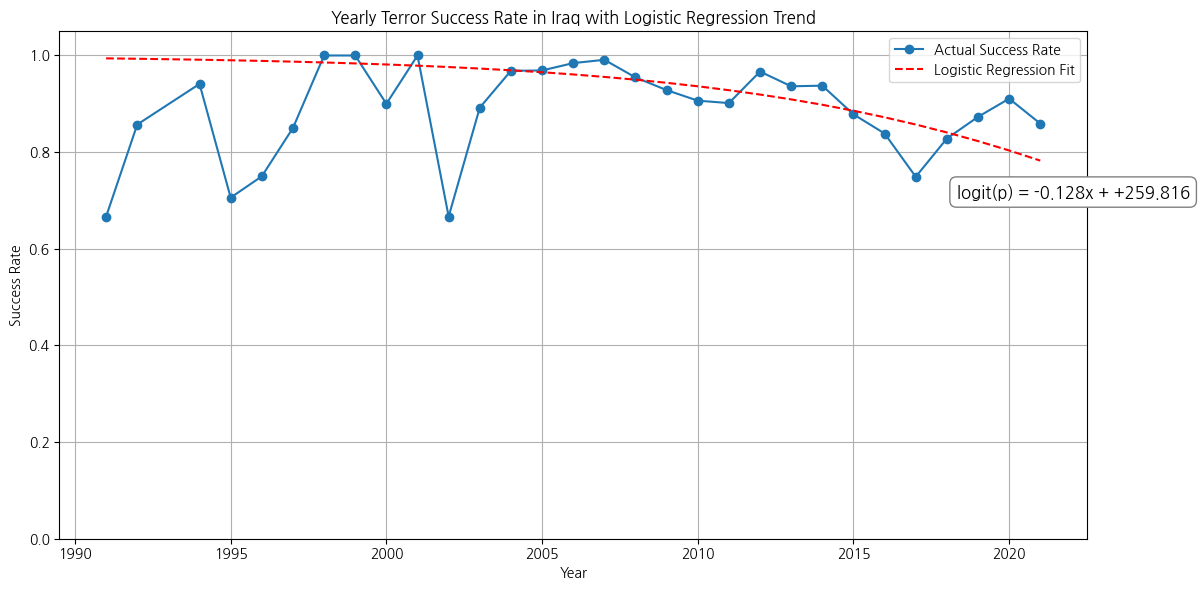

In [30]:
import numpy as np
import matplotlib.pyplot as plt

# 연도별 성공률
year_success = iraq_df.groupby("iyear")["success"].mean()
years = year_success.index.values.reshape(-1, 1)  # 연도
success_rate = year_success.values                # 실제 성공률

# 로지스틱 회귀 예측 (이미 적합된 logit_model 사용)
X_pred = sm.add_constant(years)
predicted_probs = logit_model.predict(X_pred)

# 회귀 계수 가져오기
intercept = logit_model.params["const"]
slope = logit_model.params["iyear"]

# 회귀 방정식 문자열 (logit 형태로 표기)
eq_text = f"logit(p) = {slope:.3f}x + {intercept:+.3f}"

# 시각화
plt.figure(figsize=(12, 6))
plt.plot(years, success_rate, marker='o', label='Actual Success Rate')
plt.plot(years, predicted_probs, color='red', linestyle='--', label='Logistic Regression Fit')

# 회귀식 텍스트 박스 추가
plt.text(1.1, 0.7, eq_text,
         transform=plt.gca().transAxes,
         fontsize=12, verticalalignment='top', horizontalalignment='right',
         bbox=dict(boxstyle='round,pad=0.4', facecolor='white', edgecolor='gray'))

# 그래프 요소
plt.title("Yearly Terror Success Rate in Iraq with Logistic Regression Trend")
plt.xlabel("Year")
plt.ylabel("Success Rate")
plt.ylim(0, 1.05)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

### **Mann-Kendall 추세 검정**

In [31]:
import pymannkendall as mk

# 연도별 성공률 계산
success_by_year = iraq_df.groupby("iyear")["success"].mean()

# Mann-Kendall 추세 검정
mk_result = mk.original_test(success_by_year)

# 결과 출력
print("Trend:", mk_result.trend)
print(f"p-value: {mk_result.p:.3f}")
print(f"Z-statistic: {mk_result.z:.3f}")
print("H (귀무가설 기각 여부):", mk_result.h)


Trend: no trend
p-value: 0.617
Z-statistic: -0.500
H (귀무가설 기각 여부): False


### **해석!**
- Trend	(no trend) : 연도별 테러 성공률에서 유의미한 단조 증가나 감소 추세가 없음
- p-value	(0.6171) : 매우 큼 → 일반적인 유의수준(0.05)에서 귀무가설(H₀) 기각 불가
- Z-score (-0.500) : 약한 음의 방향은 있으나 통계적으로 유의하지 않음
- H (False) : 귀무가설 기각 실패 → 추세가 없다고 판단됨

### **로지스틱 회귀와 Mann-Kendall 추세 검정 결과의 차이**
1. 로지스틱 회귀
- 검정 대상 : 성공 확률이 연도에 따라 선형적으로 변하는가?
- 모델 전제 : 선형 관계 가정
- 감도 : 작은 추세도 잡아냄
- 설명력 : 설명 가능 (기울기, p-value 등)

<br>

2. Mann-Kendall 검정
- 검정 대상 : 성공률이 단조 증가 또는 감소하는 추세가 있는가?
- 전제 : 비모수, 선형성 가정 없음
- 감도 : 추세가 불규칙하거나, 중간에 반전되면 검정력이 떨어짐
- 설명력 : 방향성만 판단 가능

<br>

3. 해석
- 로지스틱 회귀에서는 성공률이 시간이 지남에 따라 유의하게 감소(p < 0.001)
- 그러나 Mann-Kendall 검정에서는 일관된 단조 감소 추세는 발견되지 않음 (p = 0.617)
- 이라크의 테러 성공률은 시간이 지날수록 선형적으로는 감소하는 경향이 있지만, 그 감소가 일관되게 단조 감소하지는 않는다는 것을 의미

- 즉, 불규칙하게 오르내리는 구간이 있다. <br>

  → 그래서 Mann-Kendall은 "no trend", 하지만 전체적으로는 감소 방향이 뚜렷해서 로지스틱 회귀는 유의미한 감소로 판단

## **공격 유형별 기준 이라크 테러 시각화**

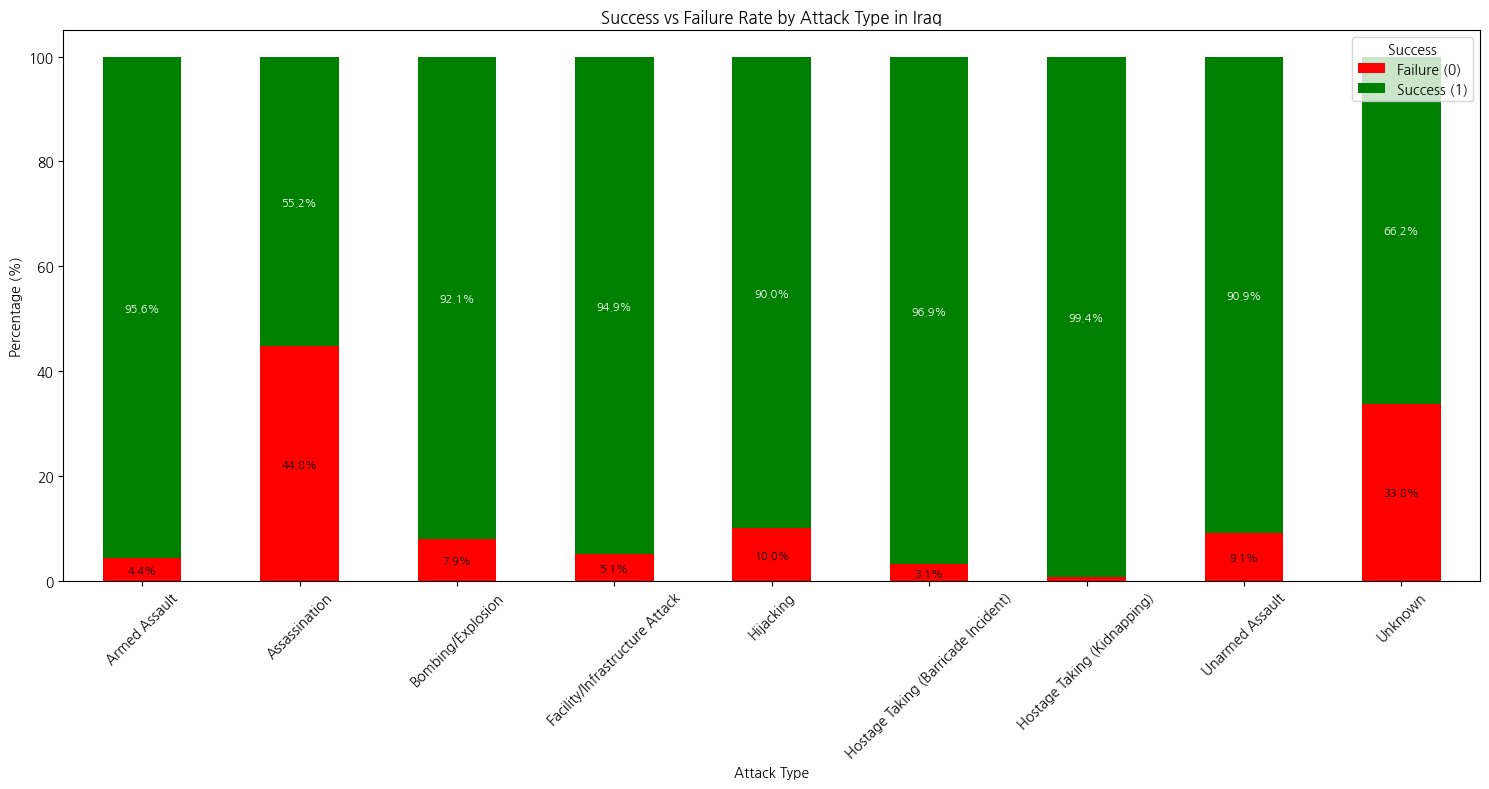

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# 공격 유형별 성공/실패 건수
attack_success = iraq_df.groupby(['attacktype1_txt', 'success']).size().reset_index(name='count')

# 각 공격유형 내에서 비율 계산
total_per_type = attack_success.groupby('attacktype1_txt')['count'].transform('sum')
attack_success['rate'] = attack_success['count'] / total_per_type * 100

# pivot: attacktype1_txt × success → rate
pivot_df = attack_success.pivot(index='attacktype1_txt', columns='success', values='rate').fillna(0)

# 시각화
ax = pivot_df.plot(kind='bar', stacked=True, figsize=(15, 8), color=['red', 'green'])

plt.title("Success vs Failure Rate by Attack Type in Iraq")
plt.ylabel("Percentage (%)")
plt.xlabel("Attack Type")
plt.legend(title='Success', labels=['Failure (0)', 'Success (1)'])
plt.xticks(rotation=45)

# 수치 라벨 표시
for i, (idx, row) in enumerate(pivot_df.iterrows()):
    failure_pct = row.get(0, 0)
    success_pct = row.get(1, 0)

    if failure_pct > 1:
        ax.text(i, failure_pct / 2, f"{failure_pct:.1f}%", ha='center', va='center', color='black', fontsize=8)
    if success_pct > 1:
        ax.text(i, failure_pct + success_pct / 2, f"{success_pct:.1f}%", ha='center', va='center', color='white', fontsize=8)

plt.tight_layout()
plt.show()


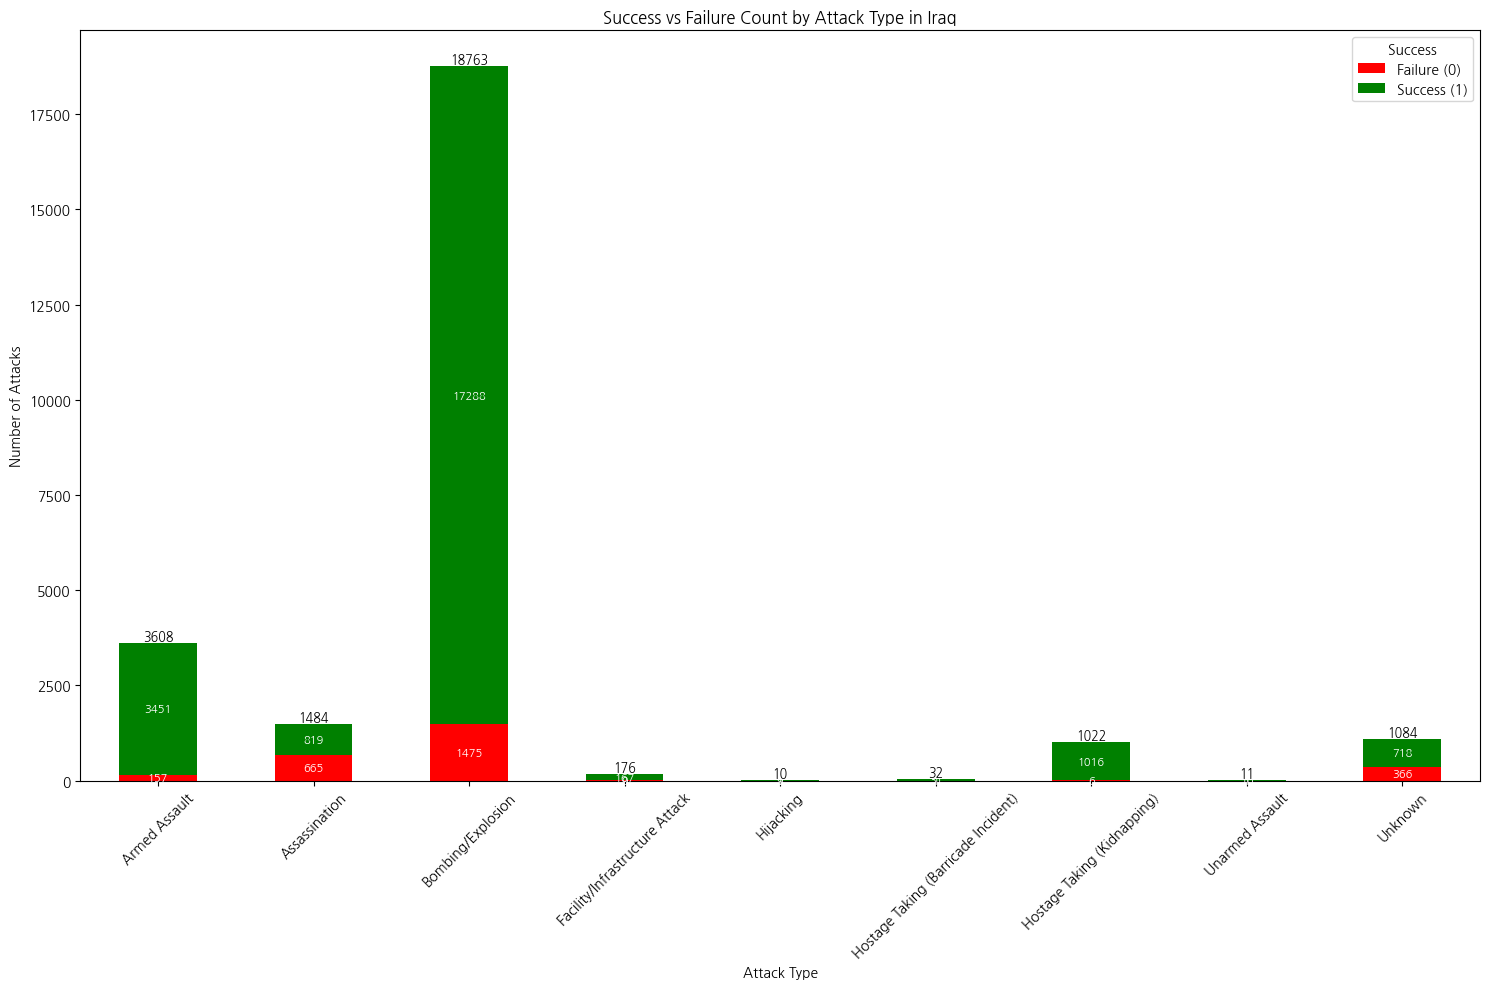

In [33]:
# 공격 유형별 성공/실패 건수 계산
attack_success = iraq_df.groupby(['attacktype1_txt', 'success']).size().reset_index(name='count')

# pivot: attacktype1_txt × success → count
pivot_df = attack_success.pivot(index='attacktype1_txt', columns='success', values='count').fillna(0)

# 시각화
ax = pivot_df.plot(kind='bar', stacked=True, figsize=(15, 10), color=['red', 'green'])

plt.title("Success vs Failure Count by Attack Type in Iraq")
plt.ylabel("Number of Attacks")
plt.xlabel("Attack Type")
plt.legend(title='Success', labels=['Failure (0)', 'Success (1)'])
plt.xticks(rotation=45)

# 수치 라벨 표시 (막대 내부)
for i, (idx, row) in enumerate(pivot_df.iterrows()):
    failure_count = row.get(0, 0)
    success_count = row.get(1, 0)
    total = failure_count + success_count

    # 실패 건수 표시 (막대 내부 중앙)
    if failure_count > 0:
        ax.text(i, failure_count / 2, str(int(failure_count)), ha='center', va='center', color='white', fontsize=8)

    # 성공 건수 표시 (누적 막대 위에 위치)
    if success_count > 0:
        ax.text(i, failure_count + success_count / 2, str(int(success_count)), ha='center', va='center', color='white', fontsize=8)

    # 총 건수 (막대 상단)
    ax.text(i, total + 3, f"{total}", ha='center', va='bottom', color='black', fontsize=9)

plt.tight_layout()
plt.show()


### **해석!**
**1. 성공**
- kidnapping(납치) >Barricade Incident(인질 농성) > Armed Assault(무장 공격) 순으로 제일 성공률이 높았다.
- kidnapping의 발생 건수는 1022 중 1016 성공 (99.4%)
- Barricade Incident의 발생 건수는 32 중 31 성공 (96.9%)
- Armed Assault의 발생 건수는 3608 중 3451 성공 (95.6%)

<br>

**2. 실패**
- Assassination(암살)이 제일 실패율이 높았다.
- Assassination의 발생 건수는 1484 중 665 실패 (44.8%)

## **공격 유형별 기준 이라크 테러 추론통계**
### **카이제곱 검정**

- 귀무가설(H₀): 이라크 내 공격 유형에 따라 테러 성공률에는 유의미한 차이가 없다.
  - 공격 유형과 테러 성공 여부는 서로 독립이다.
- 대립가설(H₁): 이라크 내 공격 유형에 따라 테러 성공률에는 유의미한 차이가 있다.
  - 공격 유형과 테러 성공 여부는 독립이 아니다.

In [34]:
from scipy.stats import chi2_contingency
import pandas as pd

# 공격유형 × 성공여부 교차표
contingency = pd.crosstab(iraq_df["attacktype1_txt"], iraq_df["success"])

# 카이제곱 독립성 검정
chi2, p, dof, expected = chi2_contingency(contingency)

# 결과 출력
print("Chi-square Test :")
print(f"Chi² statistic : {chi2:.3f}")
print(f"p-value : {p:.3f}")

Chi-square Test :
Chi² statistic : 2945.170
p-value : 0.000


### **해석!**
- p-value(0.000) : 일반적인 유의수준 0.05보다 작음
→ 귀무가설을 기각
- 따라서, 이라크 내 테러에서 공격 유형에 따라 성공 여부가 통계적으로 유의미하게 달라진다고 판단

### **공격유형별 성공/실패 표준화 잔차 히트맵 (관찰 vs 기대)**
- 카이제곱 검정 기반 기대값 계산
- 통계적 독립 가정에 기반한 수학적 계산 결과
- 가설이 틀렸다면 (즉 실제로 연관이 있다면), 관측값 ≠ 기대값, → 잔차가 커짐 → 유의미한 관계로 판단

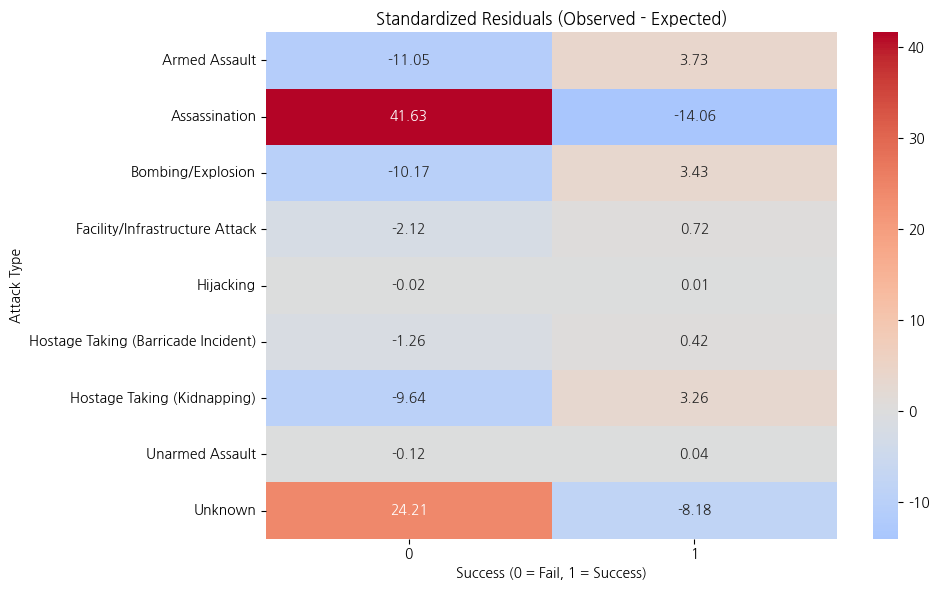

In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# 공격유형 × 성공여부 교차표
contingency = pd.crosstab(iraq_df["attacktype1_txt"], iraq_df["success"])

# 카이제곱 검정 및 기대값 계산
chi2, p, dof, expected = chi2_contingency(contingency)

# 표준화 잔차 계산: (관측 - 기대) / sqrt(기대)
residuals = (contingency - expected) / np.sqrt(expected)

# heatmap 시각화
plt.figure(figsize=(10, 6))
sns.heatmap(residuals, annot=True, cmap="coolwarm", center=0, fmt=".2f")
plt.title("Standardized Residuals (Observed - Expected)")
plt.xlabel("Success (0 = Fail, 1 = Success)")
plt.ylabel("Attack Type")
plt.tight_layout()
plt.show()


### **해석!**
**1. Assassination (암살)**
- 실패(Success = 0) 잔차: +41.63 → 기대보다 훨씬 많은 실패
- 성공(Success = 1) 잔차: -14.06 → 기대보다 훨씬 적은 성공
- 암살은 실패 비율이 매우 높음, 기대보다 압도적으로 실패가 많음

**2. Armed Assault, Bombing/Explosion, Kidnapping 등**
- 실패에서는 잔차 음수, 성공에서는 양수
- 기대보다 성공이 많음 → 상대적으로 성공률이 높은 유형

**3. Hijacking, Unarmed Assault, Facility Attack 등**
- 실제 관측값과 기대값이 비슷함, 공격 유형과 성공률 간 관계가 뚜렷하지 않음

## **무기 유형별 기준 이라크 테러 시각화**

<ipython-input-36-245af3720f16>:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weapon_success['rate'] = weapon_success.groupby('weaptype1_txt')['count'].transform(lambda x: x / x.sum() * 100)


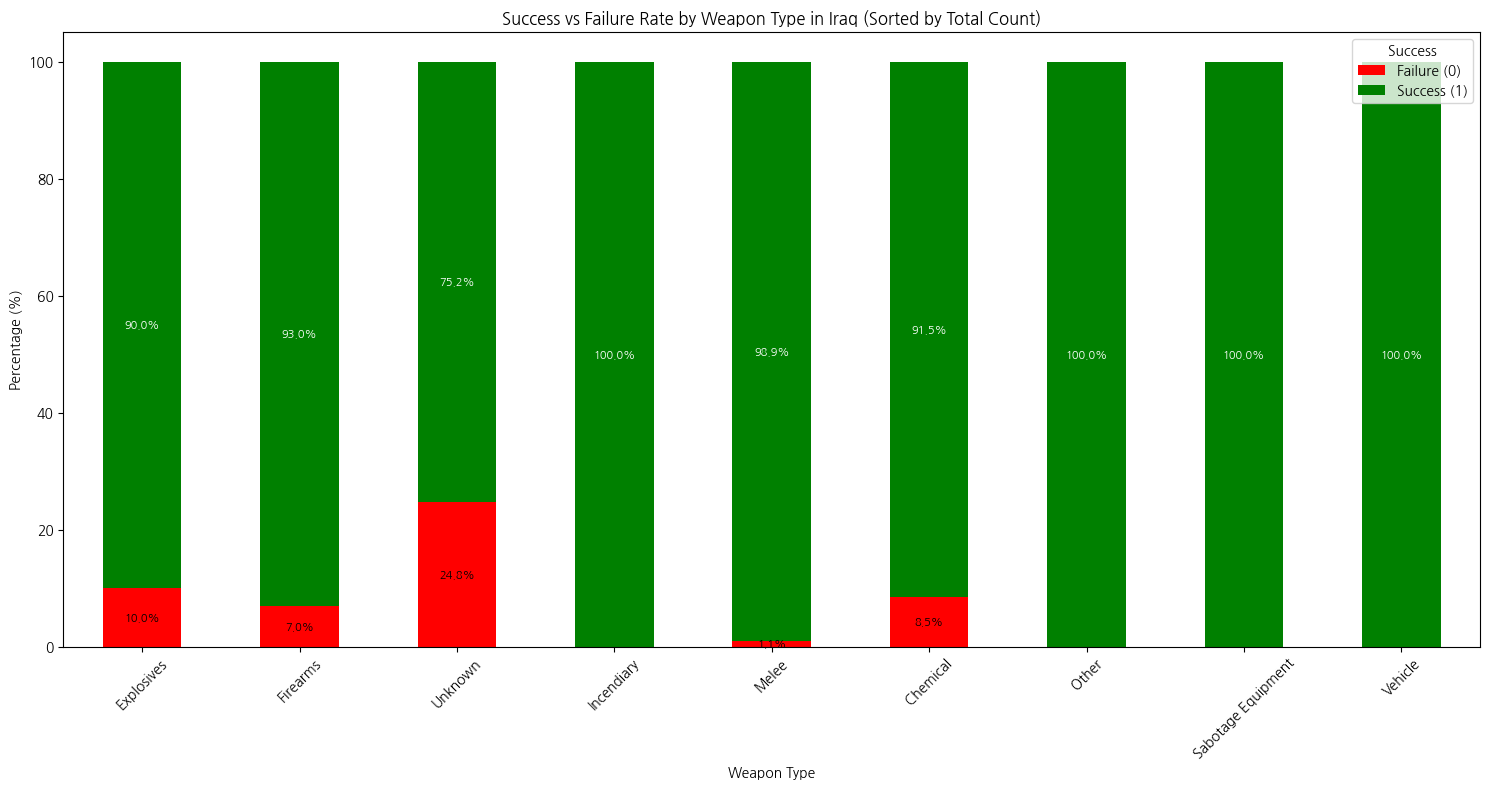

In [36]:
# 무기 유형별 성공/실패 건수 집계
weapon_success = iraq_df.groupby(['weaptype1_txt', 'success']).size().reset_index(name='count')

# 무기 유형별 총 건수 계산 후 정렬
total_per_weapon = weapon_success.groupby('weaptype1_txt')['count'].sum().sort_values(ascending=False)
sorted_weapons = total_per_weapon.index.tolist()

# 총 건수 기준으로 weaptype1_txt 순서 설정
weapon_success['weaptype1_txt'] = pd.Categorical(weapon_success['weaptype1_txt'],
                                                 categories=sorted_weapons,
                                                 ordered=True)

# 비율 계산
weapon_success['rate'] = weapon_success.groupby('weaptype1_txt')['count'].transform(lambda x: x / x.sum() * 100)

# 피벗테이블: 비율 기준
pivot_weapon = weapon_success.pivot(index='weaptype1_txt', columns='success', values='rate').fillna(0)

# 누적 막대그래프 시각화
ax = pivot_weapon.plot(kind='bar', stacked=True, figsize=(15, 8), color=['red', 'green'])

plt.title("Success vs Failure Rate by Weapon Type in Iraq (Sorted by Total Count)")
plt.ylabel("Percentage (%)")
plt.xlabel("Weapon Type")
plt.legend(title='Success', labels=['Failure (0)', 'Success (1)'])
plt.xticks(rotation=45)

# 수치 라벨 표시
for i, (idx, row) in enumerate(pivot_weapon.iterrows()):
    failure_pct = row.get(0, 0)
    success_pct = row.get(1, 0)

    if failure_pct > 1:
        ax.text(i, failure_pct / 2, f"{failure_pct:.1f}%", ha='center', va='center', color='black', fontsize=8)
    if success_pct > 1:
        ax.text(i, failure_pct + success_pct / 2, f"{success_pct:.1f}%", ha='center', va='center', color='white', fontsize=8)

plt.tight_layout()
plt.show()


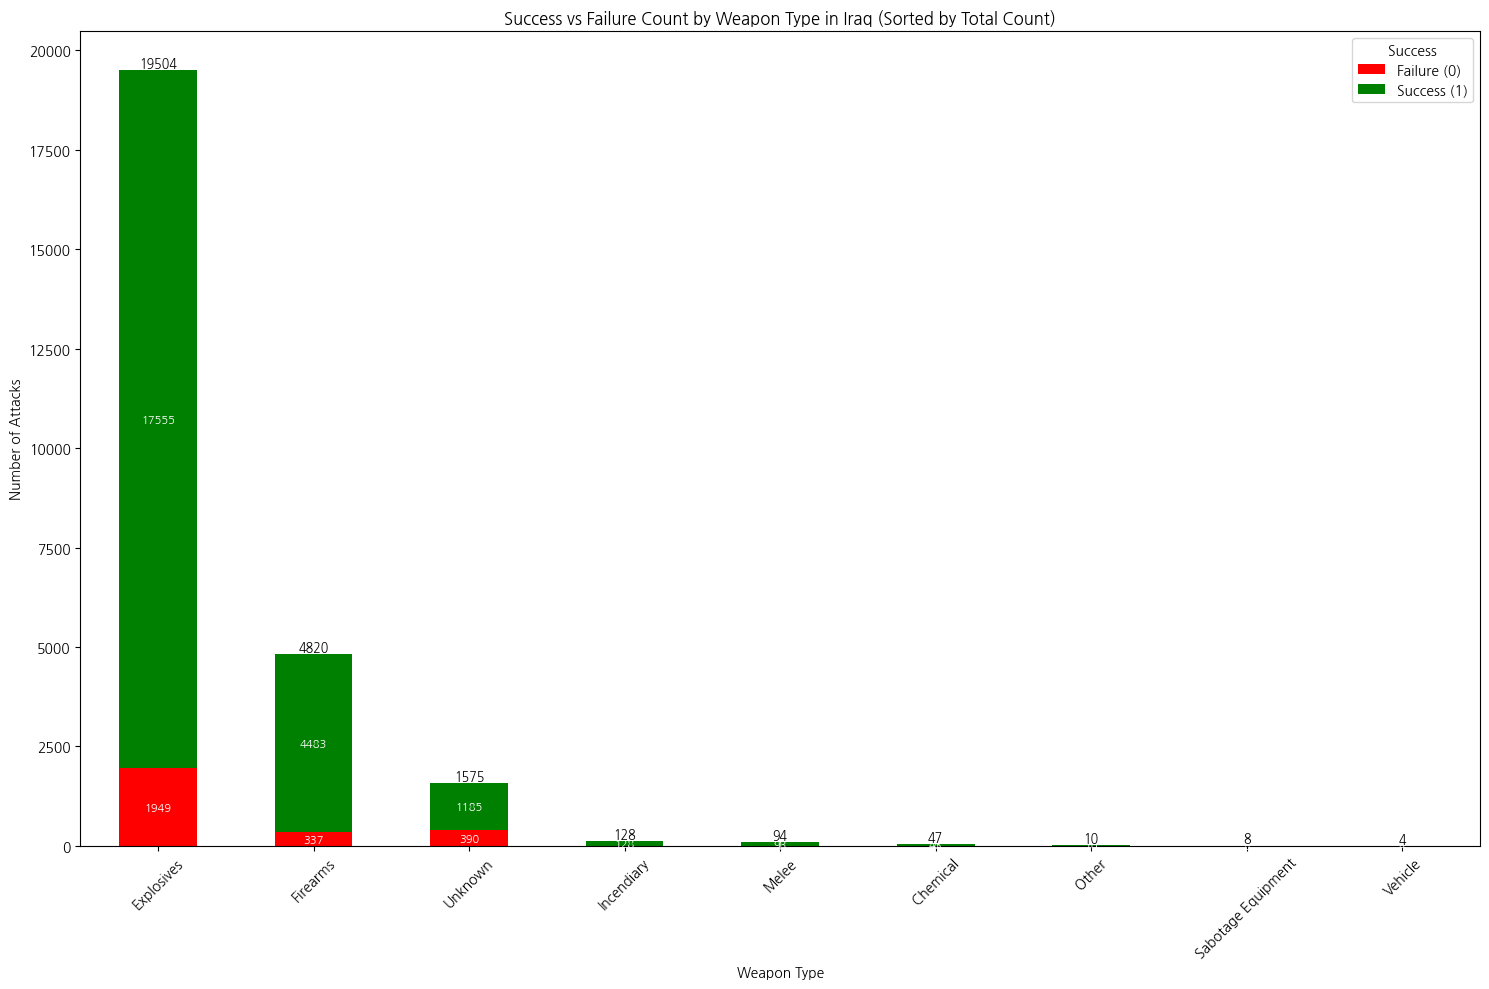

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# 무기 유형별 성공/실패 건수 계산
weapon_success = iraq_df.groupby(['weaptype1_txt', 'success']).size().reset_index(name='count')

# 무기 유형별 총합 기준 정렬을 위해 pivot 전 집계
weapon_total = weapon_success.groupby('weaptype1_txt')['count'].sum().sort_values(ascending=False).index

# 무기 유형 순서 재설정
weapon_success['weaptype1_txt'] = pd.Categorical(weapon_success['weaptype1_txt'], categories=weapon_total, ordered=True)

# 피벗테이블
pivot_weapon = weapon_success.pivot(index='weaptype1_txt', columns='success', values='count').fillna(0)

# 시각화
ax = pivot_weapon.plot(kind='bar', stacked=True, figsize=(15, 10), color=['red', 'green'])

plt.title("Success vs Failure Count by Weapon Type in Iraq (Sorted by Total Count)")
plt.ylabel("Number of Attacks")
plt.xlabel("Weapon Type")
plt.legend(title='Success', labels=['Failure (0)', 'Success (1)'])
plt.xticks(rotation=45)

# 수치 라벨 표시 (막대 내부 + 상단 총합)
for i, (idx, row) in enumerate(pivot_weapon.iterrows()):
    failure_count = row.get(0, 0)
    success_count = row.get(1, 0)
    total = failure_count + success_count

    # 실패 건수 표시
    if failure_count > 0:
        ax.text(i, failure_count / 2, str(int(failure_count)), ha='center', va='center', color='white', fontsize=8)

    # 성공 건수 표시
    if success_count > 0:
        ax.text(i, failure_count + success_count / 2, str(int(success_count)), ha='center', va='center', color='white', fontsize=8)

    # 총 건수 표시
    ax.text(i, total + 3, f"{int(total)}", ha='center', va='bottom', color='black', fontsize=9)

plt.tight_layout()
plt.show()


### **해석!**
**1. 성공**
- 성공률 100% : Incedinary(방화무기류) / Sabotage(시설 장비 파괴) / Vehicle(운송 수단)
- 그 다음 높은 성공률 (98.9%) : Melee(근접 무기류)
- Incedinary의 발생 건수는 128 중 128 성공
- Sabotage의 발생 건수는 8 중 8 성공
- Vehicle의 발생 건수는 4 중 4 성공
- Melee의 발생 건수는 94 중 93

<br>

**2. 실패**
- Unknown(미상)이 제일 실패율이 높았다.

## **무기 유형별 기준 이라크 테러 추론 통계**

### **카이제곱 독립성 검정**
- 귀무가설 (H₀)	무기 유형과 테러 성공 여부는 서로 독립이다 (즉, 성공률에 차이가 없다)
- 대립가설 (H₁)	무기 유형과 테러 성공 여부는 서로 독립이 아니다 (즉, 성공률에 차이가 있다)

In [38]:
import pandas as pd
from scipy.stats import chi2_contingency
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 무기 유형 × 성공 여부 교차표
weapon_crosstab = pd.crosstab(iraq_df["weaptype1_txt"], iraq_df["success"])

# 카이제곱 검정
chi2, p, dof, expected = chi2_contingency(weapon_crosstab)

# 결과 출력
print(f"Chi² statistic : {chi2:.3f}")
print(f"p-value  : {p:.3f}")

Chi² statistic : 443.994
p-value  : 0.000


### **해석!**
- 카이제곱 통계량(443.994) :무기 유형에 따라 테러가 성공했는지 실패했는지의 빈도 분포가,
"서로 독립적이었다면 기대되는 분포"와는 매우 크게 다르다는 의미
- p-value = 0.000 (즉, 매우 작음, p < 0.001) : 일반적인 유의수준 0.05에서 귀무가설을 기각
- 따라서, 무기 유형은 테러의 성공 여부에 통계적으로 유의한 영향을 미친다고 판단




### **무기유형별 성공/실패 표준화 잔차 히트맵 (관찰 vs 기대)**


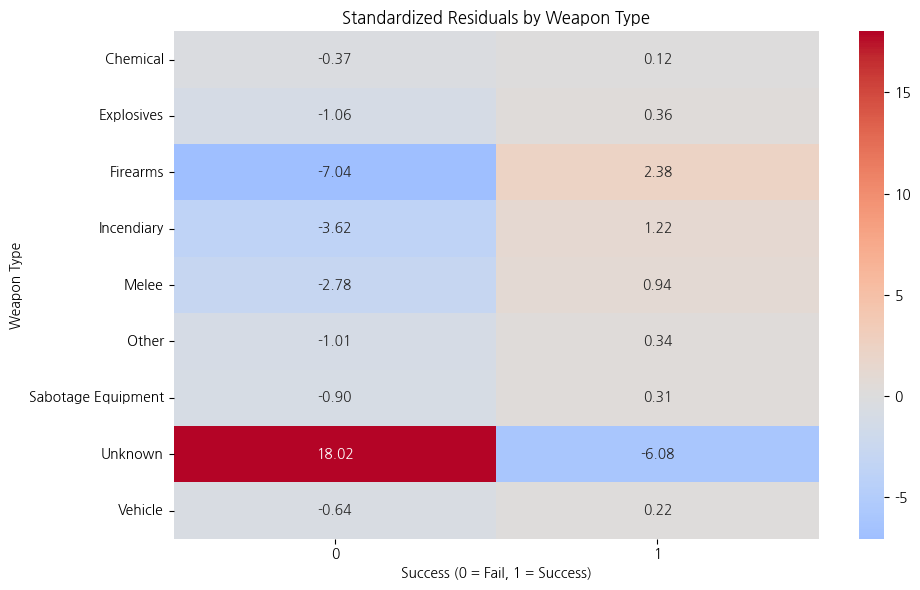

In [39]:
# 표준화 잔차 계산
residuals = (weapon_crosstab - expected) / np.sqrt(expected)

# 히트맵 시각화
plt.figure(figsize=(10, 6))
sns.heatmap(residuals, annot=True, cmap='coolwarm', center=0, fmt=".2f")
plt.title("Standardized Residuals by Weapon Type")
plt.xlabel("Success (0 = Fail, 1 = Success)")
plt.ylabel("Weapon Type")
plt.tight_layout()
plt.show()

### **해석!**
**1. Firearms (총기류)**
- 실패(0): -7.04 → 실패가 기대보다 적음
- 성공(1): +2.38 → 성공이 기대보다 많음
- 총기 사용 테러는 성공률이 기대보다 높음, 특히 실제로는 더 많이 성공함

**2. Incendiary, Melee (방화, 근접무기)**
- 잔차 -2 ~ -3 범위 (실패에서)
- 이 무기들도 실패보다 성공 확률이 높음, 기대보다 더 많이 성공한 무기 유형에 해당

**3. Explosives, Chemical, Other, Vehicle 등**
- 잔차 절대값 < 1.96
- 기대값과 실제값의 차이가 통계적으로 유의하지 않음 → 이 무기들은 테러 성공률에 있어 특정한 편향 없음


## **타겟 대상 유형별 기준 이라크 테러 시각화**

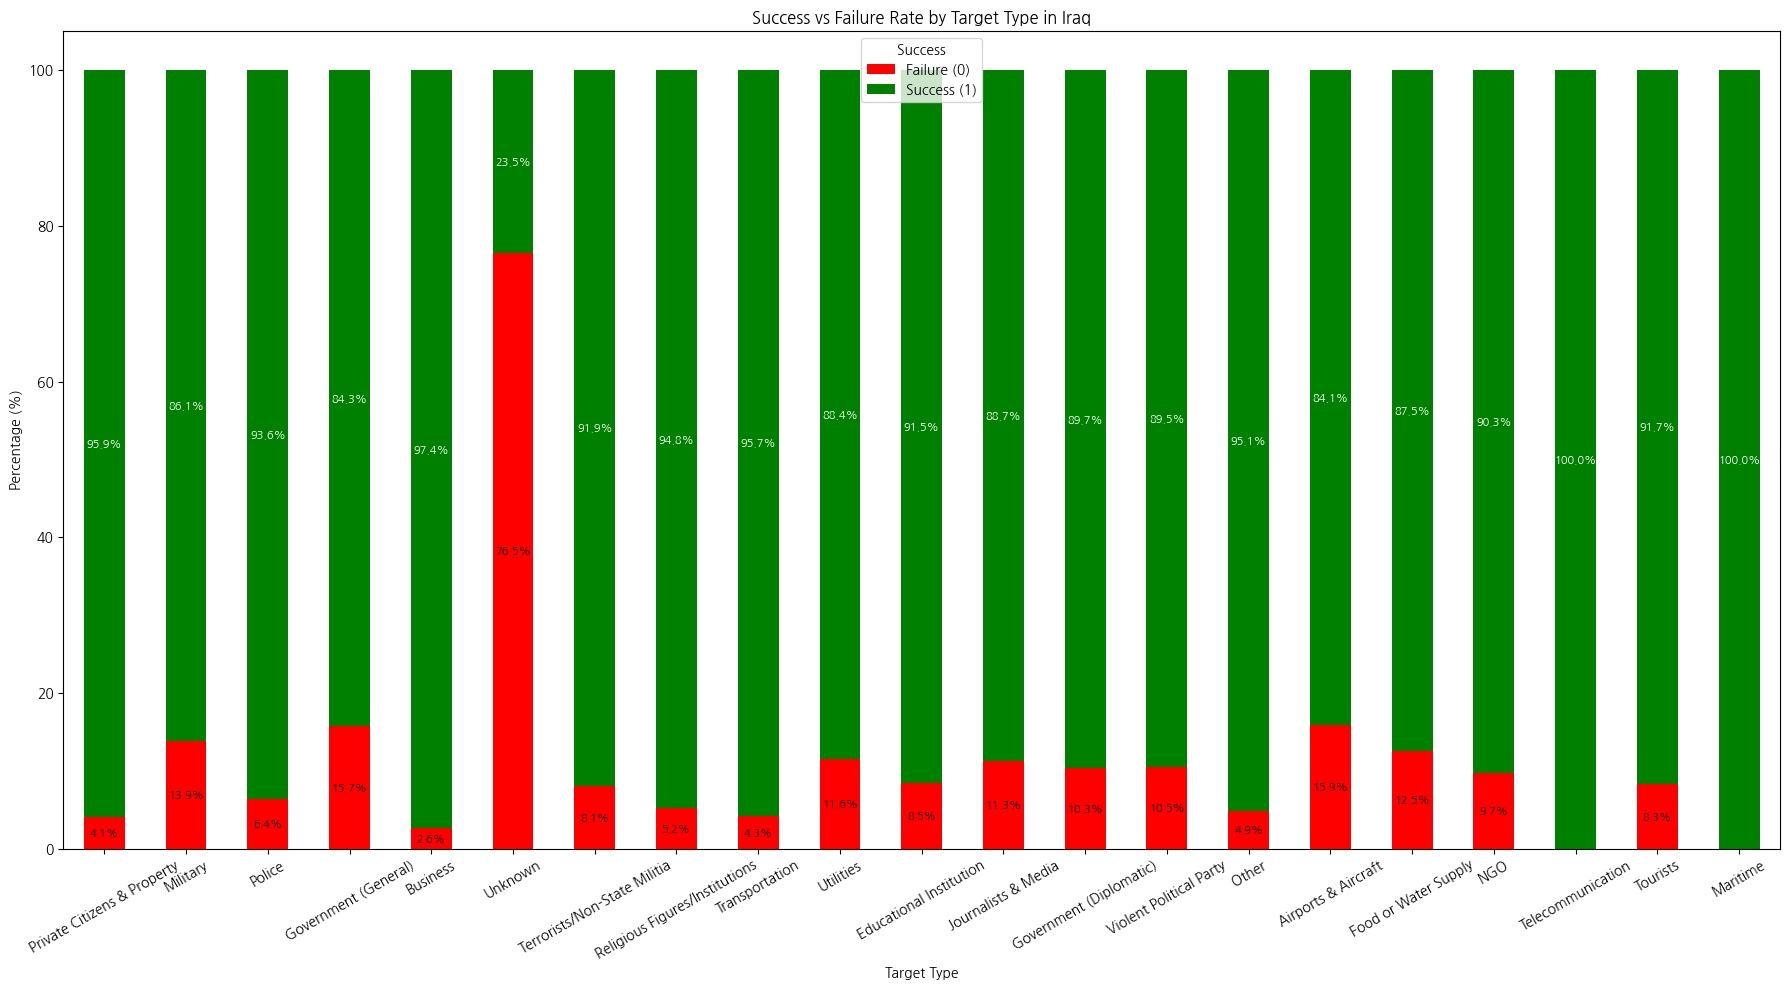

In [40]:
# 타겟 유형별 성공/실패 건수
target_success = iraq_df.groupby(['targtype1_txt', 'success']).size().reset_index(name='count')

# 비율 계산
total_per_target = target_success.groupby('targtype1_txt')['count'].transform('sum')
target_success['rate'] = target_success['count'] / total_per_target * 100

# 피벗
pivot_rate = target_success.pivot(index='targtype1_txt', columns='success', values='rate').fillna(0)

# 정렬: 총 건수 기준 내림차순
total_counts = target_success.groupby('targtype1_txt')['count'].sum()
sorted_index = total_counts.sort_values(ascending=False).index
pivot_rate = pivot_rate.loc[sorted_index]

# 시각화
ax = pivot_rate.plot(kind='bar', stacked=True, figsize=(18, 10), color=['red', 'green'])

plt.title("Success vs Failure Rate by Target Type in Iraq")
plt.ylabel("Percentage (%)")
plt.xlabel("Target Type")
plt.legend(title='Success', labels=['Failure (0)', 'Success (1)'])
plt.xticks(rotation=30)

# 수치 라벨
for i, (idx, row) in enumerate(pivot_rate.iterrows()):
    fail_pct = row.get(0, 0)
    succ_pct = row.get(1, 0)

    if fail_pct > 1:
        ax.text(i, fail_pct / 2, f"{fail_pct:.1f}%", ha='center', va='center', color='black', fontsize=8)
    if succ_pct > 1:
        ax.text(i, fail_pct + succ_pct / 2, f"{succ_pct:.1f}%", ha='center', va='center', color='white', fontsize=8)

plt.tight_layout()
plt.show()


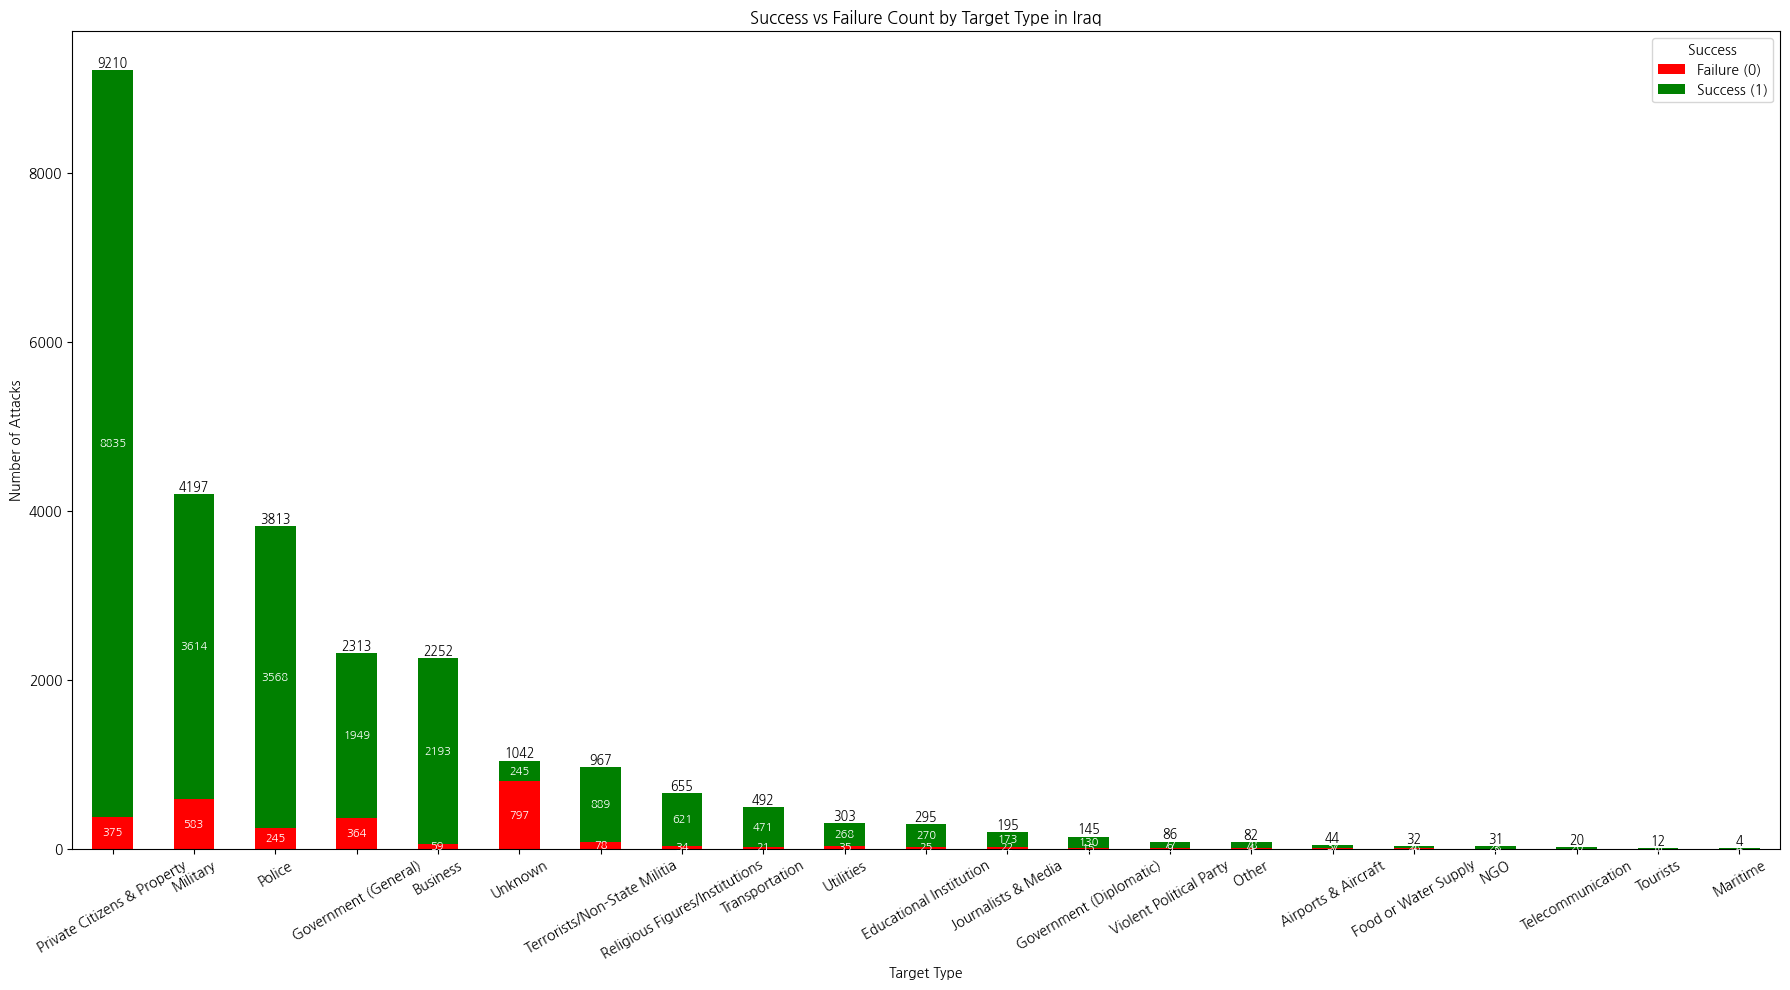

In [41]:
# 피벗: 건수 기준
pivot_count = target_success.pivot(index='targtype1_txt', columns='success', values='count').fillna(0)

# 정렬: 총 건수 기준 내림차순
pivot_count['total'] = pivot_count.sum(axis=1)
pivot_count = pivot_count.sort_values(by='total', ascending=False).drop(columns='total')

# 시각화
ax = pivot_count.plot(kind='bar', stacked=True, figsize=(18, 10), color=['red', 'green'])

plt.title("Success vs Failure Count by Target Type in Iraq")
plt.ylabel("Number of Attacks")
plt.xlabel("Target Type")
plt.legend(title='Success', labels=['Failure (0)', 'Success (1)'])
plt.xticks(rotation=30)

# 수치 라벨
for i, (idx, row) in enumerate(pivot_count.iterrows()):
    fail = row.get(0, 0)
    succ = row.get(1, 0)
    total = fail + succ

    if fail > 0:
        ax.text(i, fail / 2, str(int(fail)), ha='center', va='center', color='white', fontsize=8)
    if succ > 0:
        ax.text(i, fail + succ / 2, str(int(succ)), ha='center', va='center', color='white', fontsize=8)

    ax.text(i, total + 3, f"{int(total)}", ha='center', va='bottom', color='black', fontsize=9)

plt.tight_layout()
plt.show()


### **해석!**
**1. 성공**
- 성공률 100%인 타겟 대상 : Telecommuication(통신국) / maritime(해상)
- 그 다음 성공률 높은 타겟 대상(95%) : Private Citiznes & Property (민간인 및 민간 자산)
- 특히, 민간인의 경우는 사건 자체도 제일 많지만, 성공률도 2번째로 높음.

<br>

**2. 실패**
- Unknown을 제외하고, 미세한 차이로 Airports & Aircraft > Goverment(General) 순으로 실패율이 높다.
- Airports & Aircraft는 44 중 약 37이 실패 (15.9%)
- Goverment(General)는 2313 중 364 실패 (15.7%)

## **타겟 대상 유형별 기준 이라크 테러 추론 통계**
### **카이제곱 독립성 검정**
- 귀무가설 (H₀) : 타겟 대상과 테러 성공 여부는 서로 독립이다 (즉, 성공률에 차이가 없다)
- 대립가설 (H₁) : 타겟 대상과 테러 성공 여부는 관련 있다 (즉, 성공률이 다르다)

In [42]:
# 타겟 대상 × 성공 여부 교차표
target_crosstab = pd.crosstab(iraq_df["targtype1_txt"], iraq_df["success"])

# 카이제곱 독립성 검정
chi2, p, dof, expected = chi2_contingency(target_crosstab)

# 결과 출력
print(f"Chi² statistic : {chi2:.3f}")
print(f"p-value : {p:.4f}")

Chi² statistic : 5748.884
p-value : 0.0000


### **해석!**
- Chi² 통계량 (5748.884)은 매우 큰 값을 나타내며, 실제 관측된 성공/실패 비율이, 독립(무관)하다고 가정할 때 기대되는 비율과 매우 다름을 의미
- p-value = 0.0000 (즉, p < 0.001) → 유의수준 0.05에서 귀무가설을 기각
  - 예를 들어, 민간인(Private Citizens & Property) 대상 테러는 높은 성공률
  - 반면, Airports & Aircraft, Government 등은 실패율이 높음
 - 이 차이가 단순한 우연이 아니라, 통계적으로 매우 유의미한 차이임

### **타겟 대상 유형별 성공/실패 표준화 잔차 히트맵 (관찰 vs 기대)**


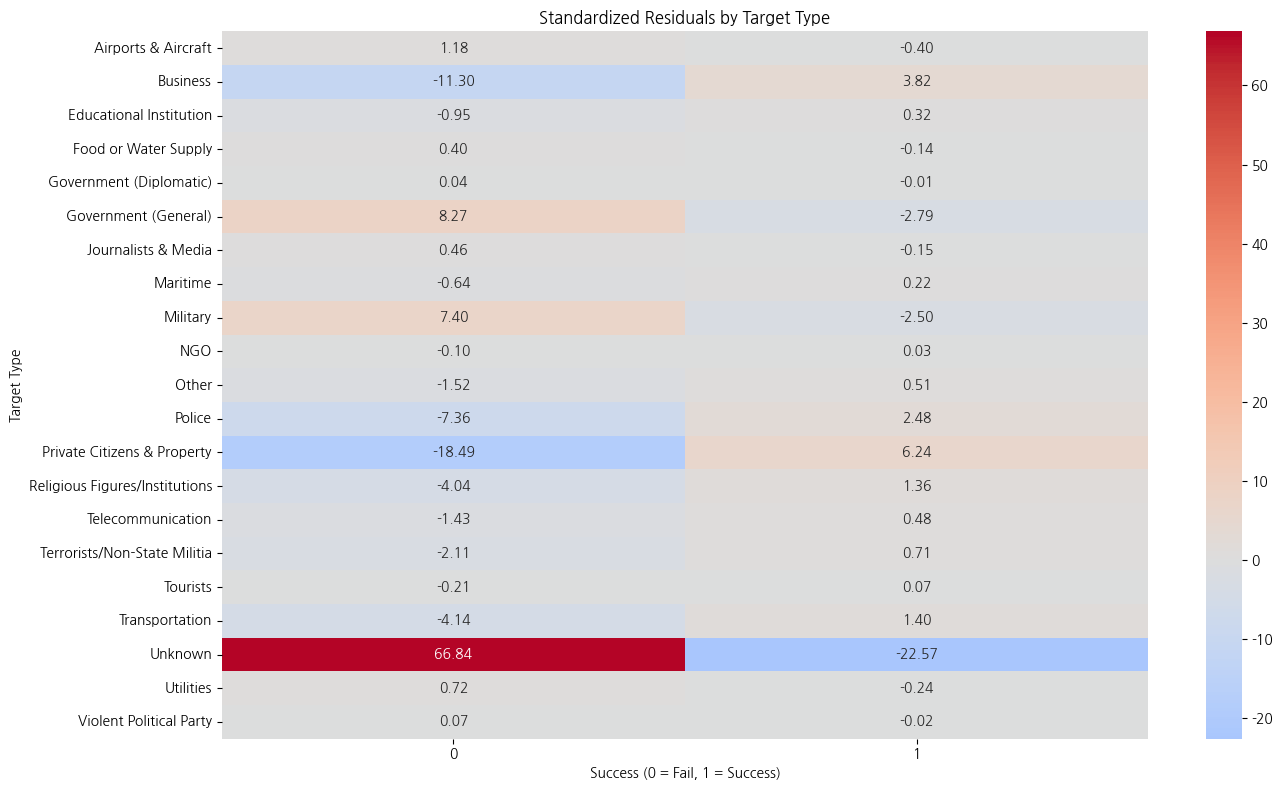

In [43]:
# 표준화 잔차 계산
residuals = (target_crosstab - expected) / np.sqrt(expected)

# 히트맵 시각화
plt.figure(figsize=(14, 8))
sns.heatmap(residuals, annot=True, cmap="coolwarm", center=0, fmt=".2f")
plt.title("Standardized Residuals by Target Type")
plt.xlabel("Success (0 = Fail, 1 = Success)")
plt.ylabel("Target Type")
plt.tight_layout()
plt.show()

### **해석!**
**1. Private Citizens & Property (민간인 및 민간 자산)**
- 실패(0) : -18.49
- 성공(1): +6.24
- 민간인을 대상으로 한 테러는 기대보다 실패가 적고 성공이 많음 → 성공률이 매우 높음, 공격 목표로서 취약하다는 통계적 결과

**2. Government (General)**
- 실패(0): +8.27
- 성공(1): –2.79
- 정부기관을 대상으로 한 테러는 실패가 많고 성공이 적음, 즉 상대적으로 방어가 잘 되어 있음

**3. Military**
- 실패: +7.40
- 성공: –2.50
- 군 대상 테러도 기대보다 실패율이 높음, 성공률 낮음

**4. Business (기업)**
- 실패: –11.30
- 성공: +3.82
- 기업 대상 테러는 성공률이 매우 높고 실패가 적음, 공격 효과가 높은 타겟 유형

**5. Police**
- 실패: –7.36
- 성공: +2.48
- 경찰 대상도 기대보다 성공률이 높음, 이는 보안 약점 또는 의도적 노출 가능성 암시

### **로지스틱 회귀 + 각 타겟 유형별 테러 성공 확률 예측**

In [44]:
import statsmodels.formula.api as smf

# 로지스틱 회귀 (타겟 유형만 고려)
model = smf.logit("success ~ C(targtype1_txt)", data=iraq_df).fit()


         Current function value: 0.263791
         Iterations: 35


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [45]:
# 예측 확률 계산용 DataFrame 생성
target_types = iraq_df['targtype1_txt'].unique()
pred_df = pd.DataFrame({'targtype1_txt': target_types})

# 예측 확률 계산
pred_df['predicted_prob'] = model.predict(pred_df)


<ipython-input-46-5d1a4c8ebec8>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=pred_df_sorted, x='predicted_prob', y='targtype1_txt', palette='crest')


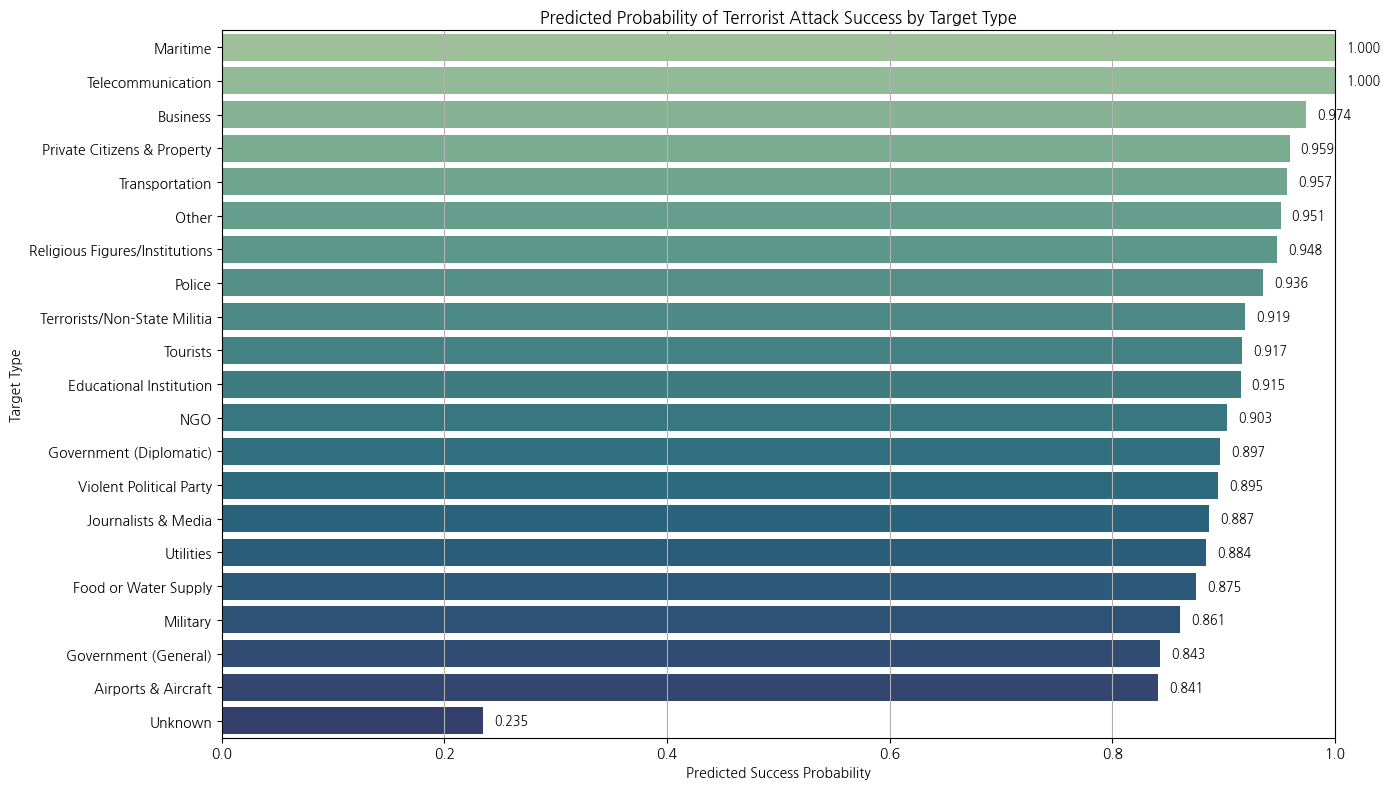

In [46]:
# 정렬
pred_df_sorted = pred_df.sort_values(by='predicted_prob', ascending=False)

# 시각화
plt.figure(figsize=(14, 8))
ax = sns.barplot(data=pred_df_sorted, x='predicted_prob', y='targtype1_txt', palette='crest')
plt.title("Predicted Probability of Terrorist Attack Success by Target Type")
plt.xlabel("Predicted Success Probability")
plt.ylabel("Target Type")
plt.xlim(0, 1)
plt.grid(axis='x')

# 수치 라벨 추가
for i, (prob, label) in enumerate(zip(pred_df_sorted['predicted_prob'], pred_df_sorted['targtype1_txt'])):
    ax.text(prob + 0.01, i, f"{prob:.3f}", color='black', va='center', fontsize=9)

plt.tight_layout()
plt.show()


### **해석!**
**1. 성공 확률이 높은 타겟 (상위)**
- Maritime(≈ 1.00) : 해상 대상 테러는 모델이 거의 확실히 성공한다고 예측
- Telecommunication	(≈ 1.00) : 통신 관련 시설도 높은 성공 확률, 방어 취약 또는 작전 용이
- Business, Private Citizens & Property, Transportation	≈ 0.95~0.98	민간 대상 테러는 성공 가능성이 매우 높음
- 민간 시설이나 통신·해운 관련 타겟은 공격에 취약하고, 실제로도 성공률이 매우 높음.

**2. 성공 확률이 낮은 타겟 (하위)**
- Airports & Aircraft	(≈ 0.83) : 항공 관련 타겟은 상대적으로 방어가 강함
- Government (General) (≈ 0.84) : 정부기관은 성공 확률이 낮음 → 경비 강화 대상

## **요일별 기준 이라크 테러 시각화**
- weekday라는 요일 파생 변수를 생성

In [47]:
# 요일 파생변수 생성
iraq_df["date"] = pd.to_datetime(dict(year=iraq_df.iyear, month=iraq_df.imonth, day=iraq_df.iday), errors='coerce')
iraq_df["weekday"] = iraq_df["date"].dt.day_name()
iraq_df['weekday']

<ipython-input-47-434a2493c27f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iraq_df["date"] = pd.to_datetime(dict(year=iraq_df.iyear, month=iraq_df.imonth, day=iraq_df.iday), errors='coerce')
<ipython-input-47-434a2493c27f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iraq_df["weekday"] = iraq_df["date"].dt.day_name()


,weekday
5955,Wednesday
8478,Monday
8553,Monday
9590,Friday
9797,Wednesday
...,...
173533,Monday
173534,Monday
173569,Tuesday
173570,Tuesday


<ipython-input-48-8a9fcd5d9ab5>:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_per_day = weekday_success.groupby('weekday')['count'].transform('sum')


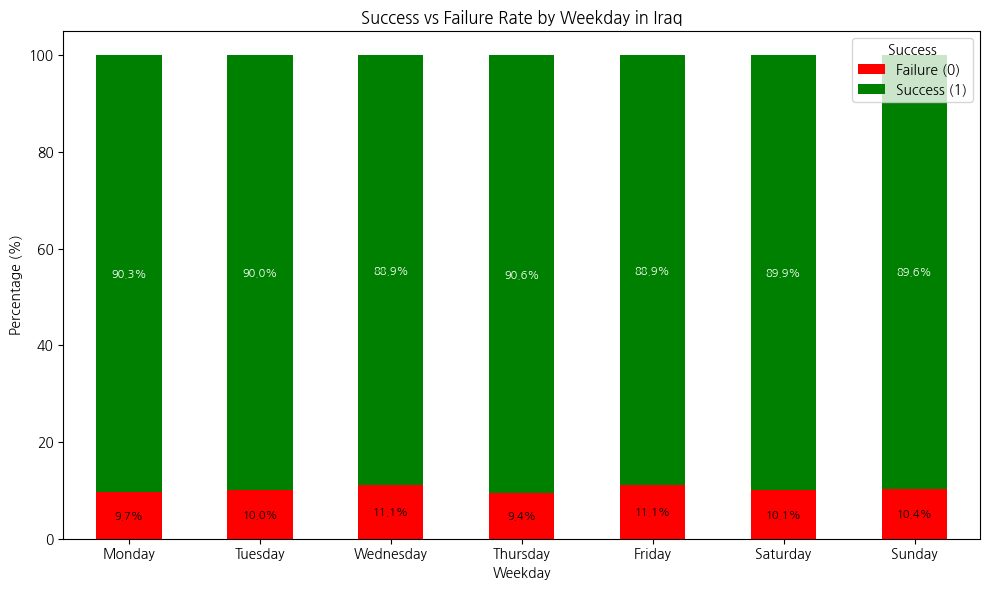

In [48]:
# 요일별 성공/실패 건수
weekday_success = iraq_df.groupby(['weekday', 'success']).size().reset_index(name='count')

# 요일 순서 강제 적용
weekday_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
weekday_success['weekday'] = pd.Categorical(weekday_success['weekday'], categories=weekday_order, ordered=True)

# 비율 계산
total_per_day = weekday_success.groupby('weekday')['count'].transform('sum')
weekday_success['rate'] = weekday_success['count'] / total_per_day * 100

# 피벗
pivot_rate = weekday_success.pivot(index='weekday', columns='success', values='rate').fillna(0).loc[weekday_order]

# 시각화
ax = pivot_rate.plot(kind='bar', stacked=True, figsize=(10, 6), color=['red', 'green'])

plt.title("Success vs Failure Rate by Weekday in Iraq")
plt.ylabel("Percentage (%)")
plt.xlabel("Weekday")
plt.legend(title='Success', labels=['Failure (0)', 'Success (1)'])
plt.xticks(rotation=0)

# 수치 라벨 표시
for i, (idx, row) in enumerate(pivot_rate.iterrows()):
    fail_pct = row.get(0, 0)
    succ_pct = row.get(1, 0)

    if fail_pct > 1:
        ax.text(i, fail_pct / 2, f"{fail_pct:.1f}%", ha='center', va='center', color='black', fontsize=8)
    if succ_pct > 1:
        ax.text(i, fail_pct + succ_pct / 2, f"{succ_pct:.1f}%", ha='center', va='center', color='white', fontsize=8)

plt.tight_layout()
plt.show()


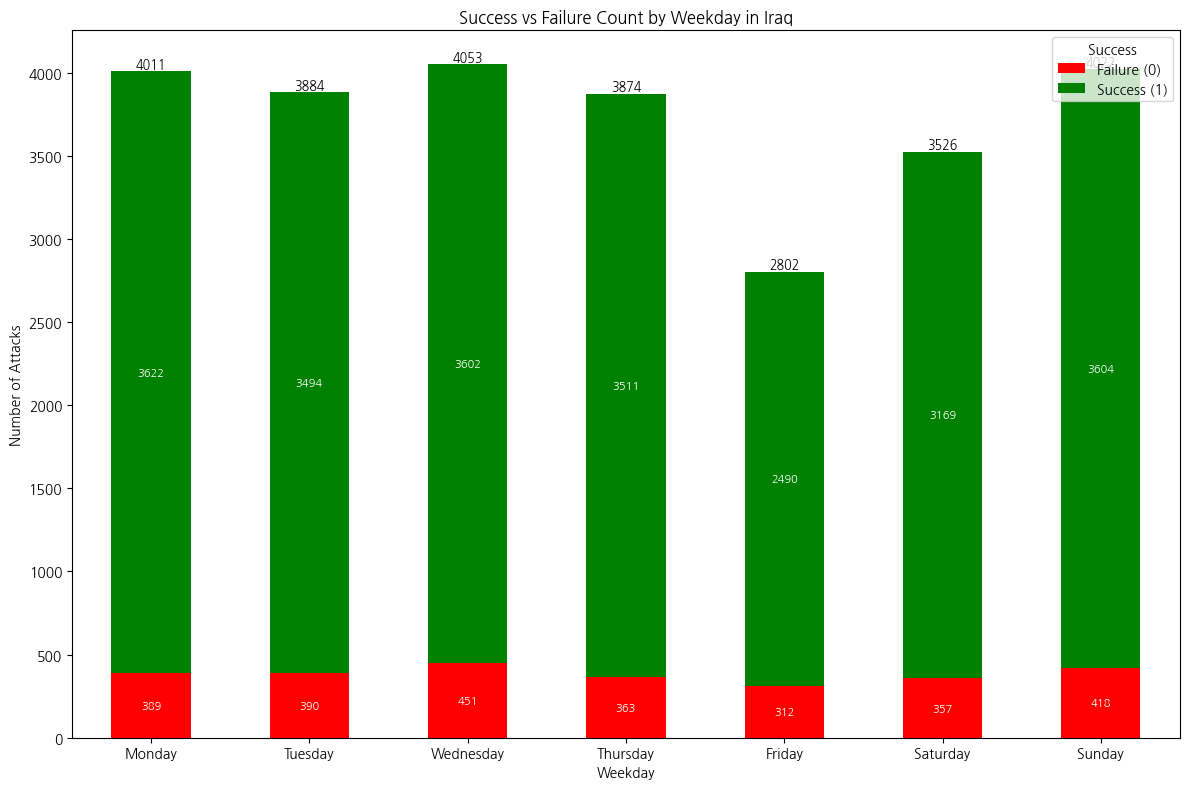

In [49]:
# 피벗: 성공/실패 건수
pivot_count = weekday_success.pivot(index='weekday', columns='success', values='count').fillna(0).loc[weekday_order]

# 시각화
ax = pivot_count.plot(kind='bar', stacked=True, figsize=(12, 8), color=['red', 'green'])

plt.title("Success vs Failure Count by Weekday in Iraq")
plt.ylabel("Number of Attacks")
plt.xlabel("Weekday")
plt.legend(title='Success', labels=['Failure (0)', 'Success (1)'])
plt.xticks(rotation=0)

# 수치 라벨 표시
for i, (idx, row) in enumerate(pivot_count.iterrows()):
    fail = row.get(0, 0)
    succ = row.get(1, 0)
    total = fail + succ

    if fail > 0:
        ax.text(i, fail / 2, str(int(fail)), ha='center', va='center', color='white', fontsize=8)
    if succ > 0:
        ax.text(i, fail + succ / 2, str(int(succ)), ha='center', va='center', color='white', fontsize=8)

    ax.text(i, total + 3, f"{total}", ha='center', va='bottom', color='black', fontsize=9)

plt.tight_layout()
plt.show()


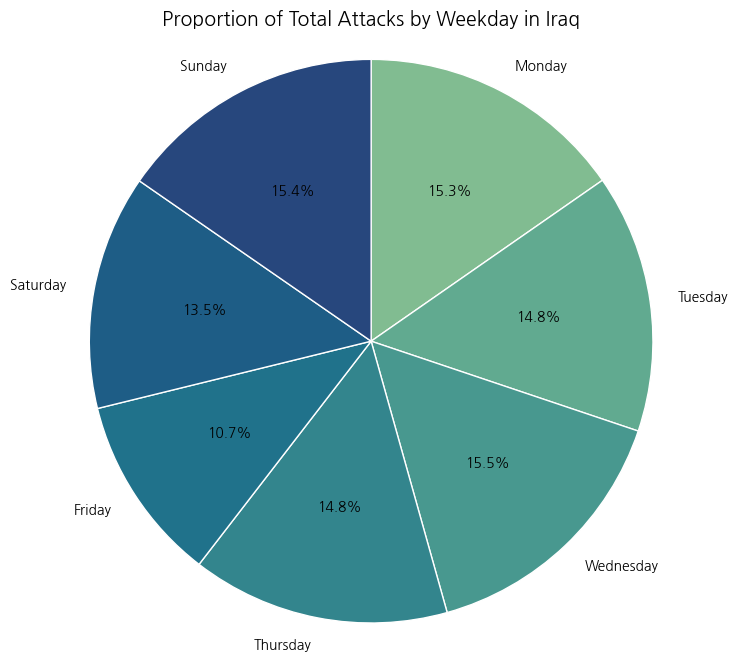

In [50]:
# 요일별 전체 테러 건수 집계
weekday_total = iraq_df["weekday"].value_counts().reindex(weekday_order).fillna(0)

# seaborn crest 팔레트
colors = sns.color_palette("crest", n_colors=len(weekday_order))

# 파이차트
plt.figure(figsize=(8, 8))
plt.pie(weekday_total,
        labels=weekday_order,
        autopct='%1.1f%%',
        startangle=90,
        counterclock=False,
        colors=colors,
        wedgeprops={'edgecolor': 'white'})
plt.title("Proportion of Total Attacks by Weekday in Iraq", fontsize=14)
plt.axis('equal')
plt.show()


### **해석!**
1.
- 성공율 자체는 큰 차이가 보이지 않음

2.
- 오히려 요일별 테러 건수 차이에 대해 주목 할 만하다고 판단
- 수 > 일 > 월 순으로 테러가 많이 발생
- 금요일은 상대적으로 적은 테러 발생 (전체 중 10.7%)

## **요일별 기준 이라크 테러 추론 통계**


#### **카이제곱 적합도 검정 & 독립성 검정**
1. 적합도 검정 (Goodness of Fit)
- 실제 요일별 건수 vs 균등 분포 비교를 보기 위한 검정

<br>

2. 독립성 검정 (Independence)
- 	요일 × 성공 여부 범주형 비교를 보기 위한 검

### **가설(1) - 요일별 발생 건수 차이 검정**
#### **카이제곱 적합도 검정**
- 귀무가설 H₀: 요일별 테러 발생 수는 유의미한 차이가 없다. (모든 요일에 균등하게 발생)
- 대립가설 H₁: 요일별 테러 발생 수는 유의미한 차이가 있다.

In [51]:
from scipy.stats import chisquare

# 요일별 실제 건수
weekday_counts = iraq_df["weekday"].value_counts().reindex(weekday_order).fillna(0)

# 기대값: 균등하게 발생했다고 가정 (전체 평균)
expected = [weekday_counts.sum() / 7] * 7

# 카이제곱 적합도 검정
chi2_stat, p_val = chisquare(f_obs=weekday_counts, f_exp=expected)

print(f"Chi² statistic : {chi2_stat:.3f}")
print(f"p-value  : {p_val:.4f}")

Chi² statistic : 325.034
p-value  : 0.0000


### **가설(2) - 요일별 성공률 차이 검정**
#### **카이제곱 독립성 검정**
- 귀무가설 H₀: 요일과 테러 성공 여부는 독립이다. (성공률에 차이 없음)
- 대립가설 H₁: 요일에 따라 성공률에 유의미한 차이가 있다.

In [52]:
from scipy.stats import chi2_contingency

# 요일 × 성공 여부 교차표
contingency = pd.crosstab(iraq_df["weekday"], iraq_df["success"]).reindex(weekday_order).fillna(0)

# 카이제곱 독립성 검정
chi2, p, dof, expected = chi2_contingency(contingency)

print(f"Chi² statistic : {chi2:.3f}")
print(f"p-value : {p:.4f}")

Chi² statistic : 10.705
p-value : 0.0979


### **해석!**
**1. 요일별 발생 건수 차이 검정**
- p < 0.001 → 귀무가설 기각
- 요일별 테러 발생 건수에 유의미한 차이가 있음
- 즉, 특정 요일에 테러 집중

**2. 요일별 성공률 차이 검정**
- p = 0.0979 > 0.05 → 귀무가설 채택
- 요일에 따라 테러의 성공률 차이는 통계적으로 유의하지 않음
- 즉, 요일과 성공률은 무관


## **월별 기준 이라크 테러 시각화**




In [53]:
# 월별 success=0/1 건수 계산
monthly_counts = iraq_df.groupby(['imonth', 'success']).size().unstack(fill_value=0).sort_index()

# 월 이름 수동 정의
month_labels = ["January", "February", "March", "April", "May", "June",
                "July", "August", "September", "October", "November", "December"]


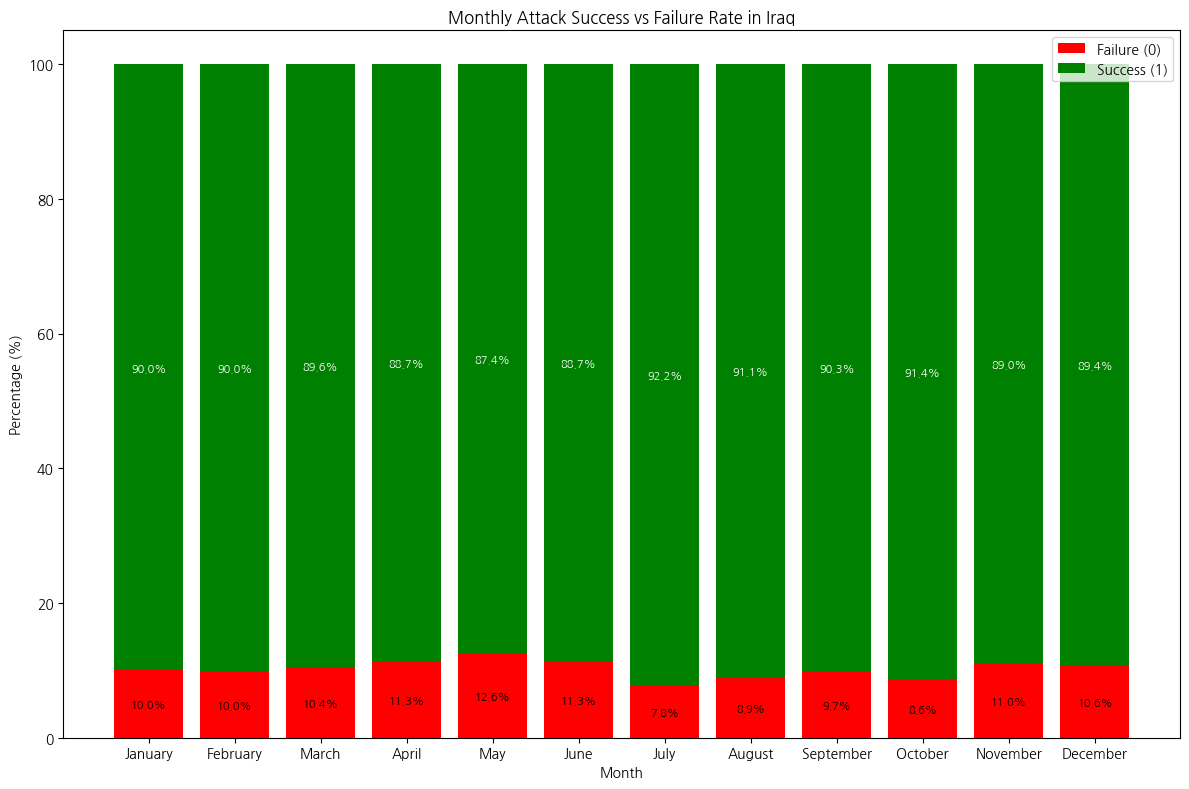

In [54]:
import matplotlib.pyplot as plt

# 비율 계산
monthly_percent = monthly_counts.div(monthly_counts.sum(axis=1), axis=0) * 100

# 시각화
plt.figure(figsize=(12, 8))
plt.bar(monthly_percent.index, monthly_percent[0], label='Failure (0)', color='red')
plt.bar(monthly_percent.index, monthly_percent[1], bottom=monthly_percent[0], label='Success (1)', color='green')

# 수치 라벨 (퍼센트)
for i in monthly_percent.index:
    fail_pct = monthly_percent.loc[i, 0]
    succ_pct = monthly_percent.loc[i, 1]
    if fail_pct > 1:
        plt.text(i, fail_pct / 2, f"{fail_pct:.1f}%", ha='center', va='center', fontsize=8, color='black')
    if succ_pct > 1:
        plt.text(i, fail_pct + succ_pct / 2, f"{succ_pct:.1f}%", ha='center', va='center', fontsize=8, color='white')

plt.title("Monthly Attack Success vs Failure Rate in Iraq")
plt.xlabel("Month")
plt.ylabel("Percentage (%)")
plt.xticks(monthly_counts.index, month_labels[:len(monthly_counts)], rotation=0)
plt.legend()
plt.tight_layout()
plt.show()


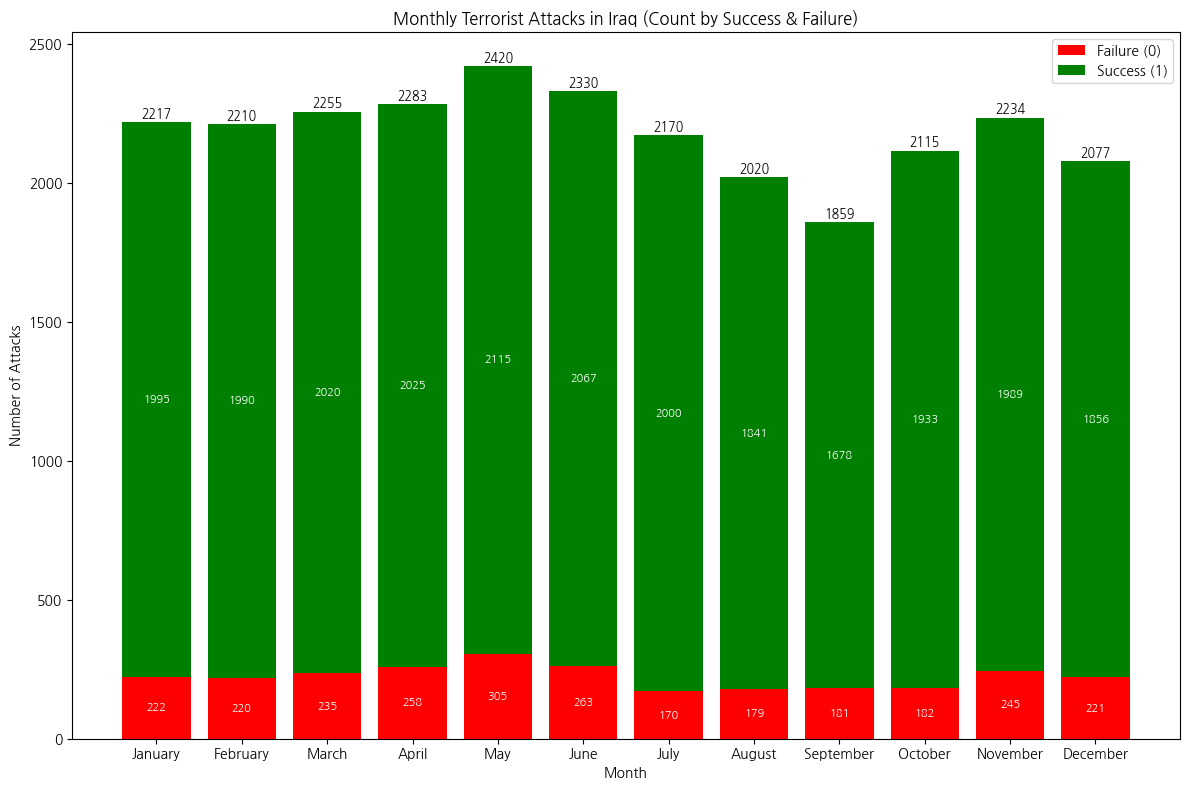

In [55]:
# 시각화
plt.figure(figsize=(12, 8))
plt.bar(monthly_counts.index, monthly_counts[0], label='Failure (0)', color='red')
plt.bar(monthly_counts.index, monthly_counts[1], bottom=monthly_counts[0], label='Success (1)', color='green')

# 수치 라벨 (건수 + 총합)
for i in monthly_counts.index:
    fail = monthly_counts.loc[i, 0]
    succ = monthly_counts.loc[i, 1]
    total = fail + succ

    if fail > 0:
        plt.text(i, fail / 2, str(int(fail)), ha='center', va='center', fontsize=8, color='white')
    if succ > 0:
        plt.text(i, fail + succ / 2, str(int(succ)), ha='center', va='center', fontsize=8, color='white')

    plt.text(i, total + 5, f"{total}", ha='center', va='bottom', fontsize=9, color='black')

plt.title("Monthly Terrorist Attacks in Iraq (Count by Success & Failure)")
plt.xlabel("Month")
plt.ylabel("Number of Attacks")
plt.xticks(monthly_counts.index, month_labels[:len(monthly_counts)], rotation=0)
plt.legend()
plt.tight_layout()
plt.show()


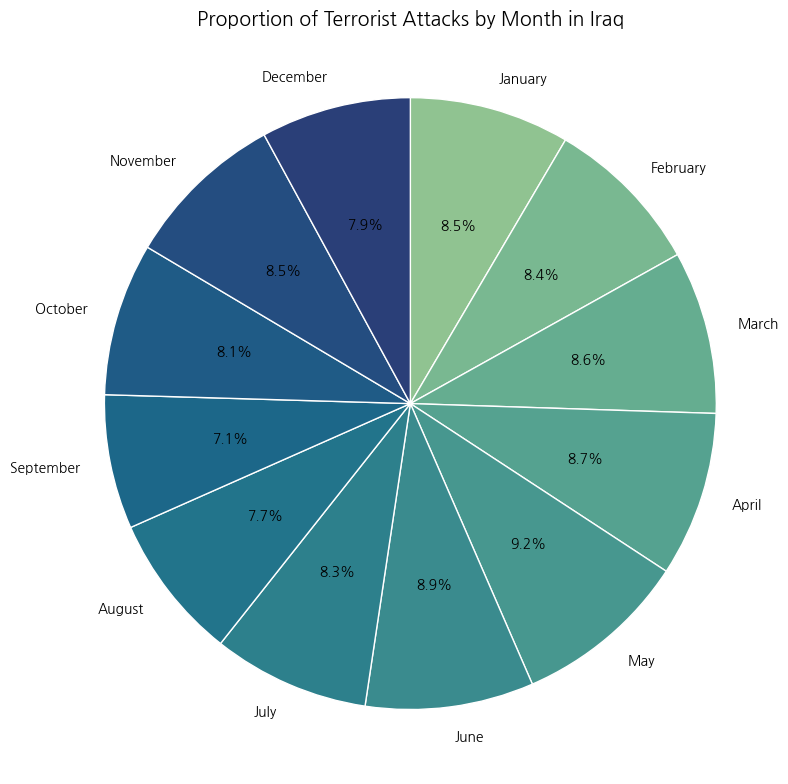

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

# 월별 전체 테러 건수 집계
monthly_total = iraq_df["imonth"].value_counts().sort_index()

# 월 이름 수동 정의
month_labels = ["January", "February", "March", "April", "May", "June",
                "July", "August", "September", "October", "November", "December"]

# 색상 팔레트: seaborn crest
colors = sns.color_palette("crest", n_colors=len(monthly_total))

# 파이차트
plt.figure(figsize=(8, 8))
plt.pie(monthly_total,
        labels=month_labels[:len(monthly_total)],
        autopct='%1.1f%%',
        startangle=90,
        counterclock=False,
        colors=colors,
        wedgeprops={'edgecolor': 'white'})

plt.title("Proportion of Terrorist Attacks by Month in Iraq", fontsize=14)
plt.axis('equal')  # 원형 유지
plt.tight_layout()
plt.show()


### **해석!**
1.
- 성공율 자체는 월별 차이가 미비
- 상대적으로 7월이 조금 높음
- 전체적으로 88~90% 이상의 성공율을 보인다.

2.
- 월별 테러 건수 차이에 대해서 봤을때,
- 5 > 6 > 4 > 3 순으로 많이 발생
- 9월은 상대적으로 적은 테러 발생 (전체 중 7.1%)

## **월별 기준 이라크 테러 추론 통계**


### **가설(1) - 월별 발생 건수 차이 검정**
#### **카이제곱 적합도 검정**
- 귀무가설 H₀: 월별 테러 발생 건수는 균등하다. (모든 달에 비슷하게 발생)
- 대립가설 H₁: 월별 테러 발생 건수에는 유의미한 차이가 있다.

In [57]:
from scipy.stats import chisquare, chi2_contingency
import pandas as pd

# 월별 테러 발생 건수 차이
monthly_counts_total = iraq_df['imonth'].value_counts().sort_index()
expected = [monthly_counts_total.sum() / len(monthly_counts_total)] * len(monthly_counts_total)

chi2_stat_a, p_val_a = chisquare(f_obs=monthly_counts_total, f_exp=expected)

print(f"Chi² statistic: {chi2_stat_a:.3f}")
print(f"p-value : {p_val_a:.4f}")

Chi² statistic: 112.265
p-value : 0.0000


### **가설(2) - 요일별 성공률 차이 검정**
#### **카이제곱 독립성 검정**
- 귀무가설 H₀: 월과 테러 성공 여부는 독립이다. (성공률은 월별 차이 없음)
- 대립가설 H₁: 월별로 테러 성공률에 유의미한 차이가 있다.

In [58]:
### 월별 테러 성공률 차이
contingency = pd.crosstab(iraq_df['imonth'], iraq_df['success']).sort_index()
chi2_stat_b, p_val_b, dof_b, expected_b = chi2_contingency(contingency)

print(f"Chi² statistic : {chi2_stat_b:.3f}")
print(f"p-value : {p_val_b:.4f}")

Chi² statistic : 46.847
p-value : 0.0000


### **해석!**
**1. 요일별 발생 건수 차이 검정**
- p < 0.001 → 귀무가설 기각
- 월별 테러 발생 건수에 유의미한 차이가 있음
- 월별로 테러 건수에 뚜렷한 차이가 있으며, 계절적 또는 전략적 집중 시기가 있음

**2. 요일별 성공률 차이 검정**
- p < 0.001 → 귀무가설 기각
- 월별 테러 성공률에도 유의미한 차이가 있음
- 월에 따라 성공률도 통계적으로 차이 있음 → 계절적 요인, 타겟 환경 변화 등이 영향을 미쳤을 가능성


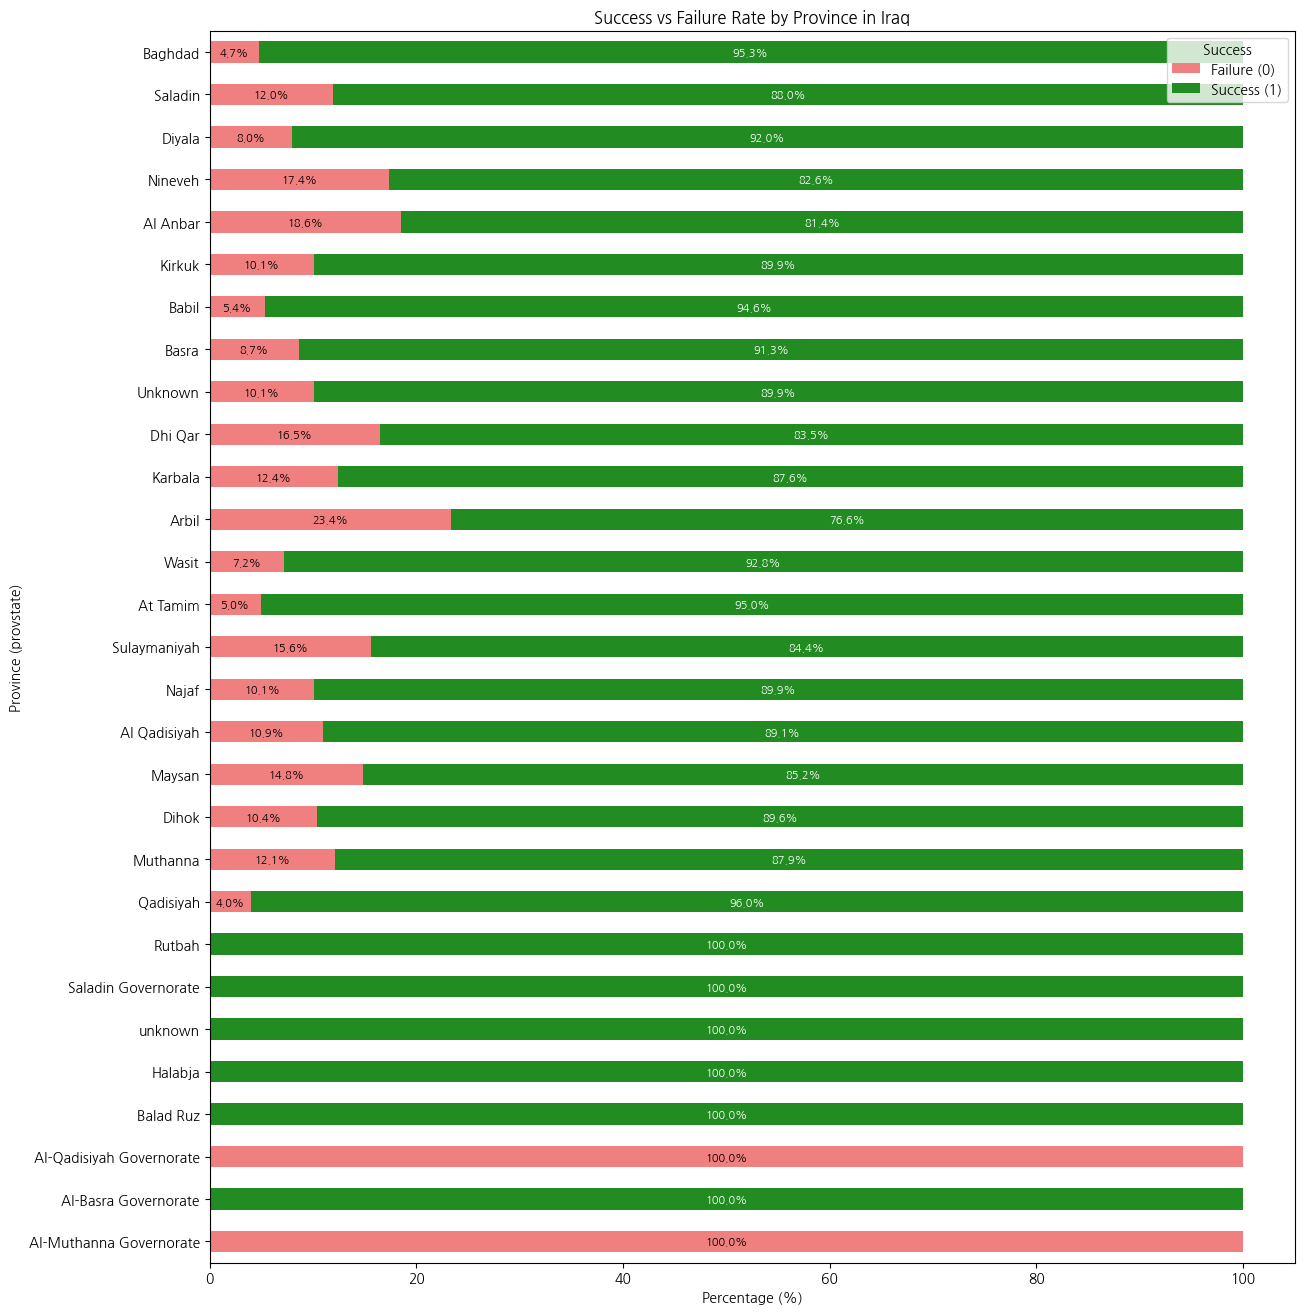

In [59]:
# 성공/실패 건수 집계
prov_success = iraq_df.groupby(['provstate', 'success']).size().reset_index(name='count')

# 비율 계산
total_per_prov = prov_success.groupby('provstate')['count'].transform('sum')
prov_success['rate'] = prov_success['count'] / total_per_prov * 100

# 비율 피벗
pivot_rate = prov_success.pivot(index='provstate', columns='success', values='rate').fillna(0)

# 정렬: 총 건수 기준 내림차순
total_counts = prov_success.groupby('provstate')['count'].sum()
sorted_index = total_counts.sort_values(ascending=True).index
pivot_rate = pivot_rate.loc[sorted_index]

# 비율 시각화
ax = pivot_rate.plot(kind='barh', stacked=True, figsize=(14, 16), color=['lightcoral', 'forestgreen'])
plt.title("Success vs Failure Rate by Province in Iraq")
plt.xlabel("Percentage (%)")
plt.ylabel("Province (provstate)")
plt.legend(title='Success', labels=['Failure (0)', 'Success (1)'])
plt.yticks(rotation=0)

# 수치 표시
for i, (idx, row) in enumerate(pivot_rate.iterrows()):
    fail_pct = row.get(0, 0)
    succ_pct = row.get(1, 0)

    if fail_pct > 1:
        ax.text(fail_pct / 2, i, f"{fail_pct:.1f}%", va='center', ha='center', color='black', fontsize=8)
    if succ_pct > 1:
        ax.text(fail_pct + succ_pct / 2, i, f"{succ_pct:.1f}%", va='center', ha='center', color='white', fontsize=8)
plt.show()

## **이라크 내 행정구역 관련 시각화**

In [60]:
iraq_df['provstate'] = iraq_df['provstate'].replace({
    'Al-Basra Governorate': 'Basra',
    'Al-Qadisiyah Governorate': 'Al-Qadisiyah',
    'Al-Muthanna Governorate': 'Muthanna',
    'Saladin Governorate': 'Saladin',
    'unknown': 'Unknown',
    'Al-Qadisiyah': 'Al Qadisiyah',
    'Qadisiyah': 'Al Qadisiyah',
    'At Tamim': 'Kirkuk',
    'Balad Ruz': 'Diyala',         # Balad Ruz → Diyala 소속 도시
    'Rutbah': 'Al Anbar',          # Rutbah → Al Anbar 소속 도시
})


<ipython-input-60-e79f02abc2fe>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iraq_df['provstate'] = iraq_df['provstate'].replace({


In [61]:
iraq_df['provstate'].value_counts().sort_values(ascending=False)

,count
provstate,
Baghdad,7848
Saladin,3627
Diyala,3581
Nineveh,3204
Al Anbar,3110
Kirkuk,2176
Babil,1187
Basra,347
Unknown,160


, layer="gadm36_IRQ_1"

In [62]:
import geopandas as gpd

# 파일 불러오기 (예: 'gadm36_IRQ.gpkg')
gdf = gpd.read_file("/content/gadm36_IRQ.gpkg",layer="gadm36_IRQ_1")

In [63]:
gdf.columns


Index(['GID_0', 'NAME_0', 'GID_1', 'NAME_1', 'VARNAME_1', 'NL_NAME_1',
       'TYPE_1', 'ENGTYPE_1', 'CC_1', 'HASC_1', 'geometry'],
      dtype='object')

In [64]:
gdf.to_file("iraq_admin1.geojson", driver="GeoJSON")

### **이라크 테러 맵차트**

In [65]:
import plotly.express as px
import json

# GeoJSON 불러오기
with open("iraq_admin1.geojson", "r", encoding="utf-8") as f:
    iraq_geojson = json.load(f)

# 시각화할 데이터 (iraq_df에서 provstate별 건수 집계)
df_map = iraq_df['provstate'].value_counts().reset_index()
df_map.columns = ['provstate', 'count']

# Plotly Choropleth
fig = px.choropleth(
    df_map,
    geojson=iraq_geojson,
    featureidkey="properties.NAME_1",
    locations="provstate",
    color="count",
    color_continuous_scale="Reds",
    labels={"count": "Number of Attacks"},
    title="Terror Attacks by Province in Iraq"
)

fig.update_geos(fitbounds="locations", visible=False)
fig.update_layout(margin={"r":0,"t":40,"l":0,"b":0})
fig.show()


### **이라크 행정 구역별 테러 성공률**

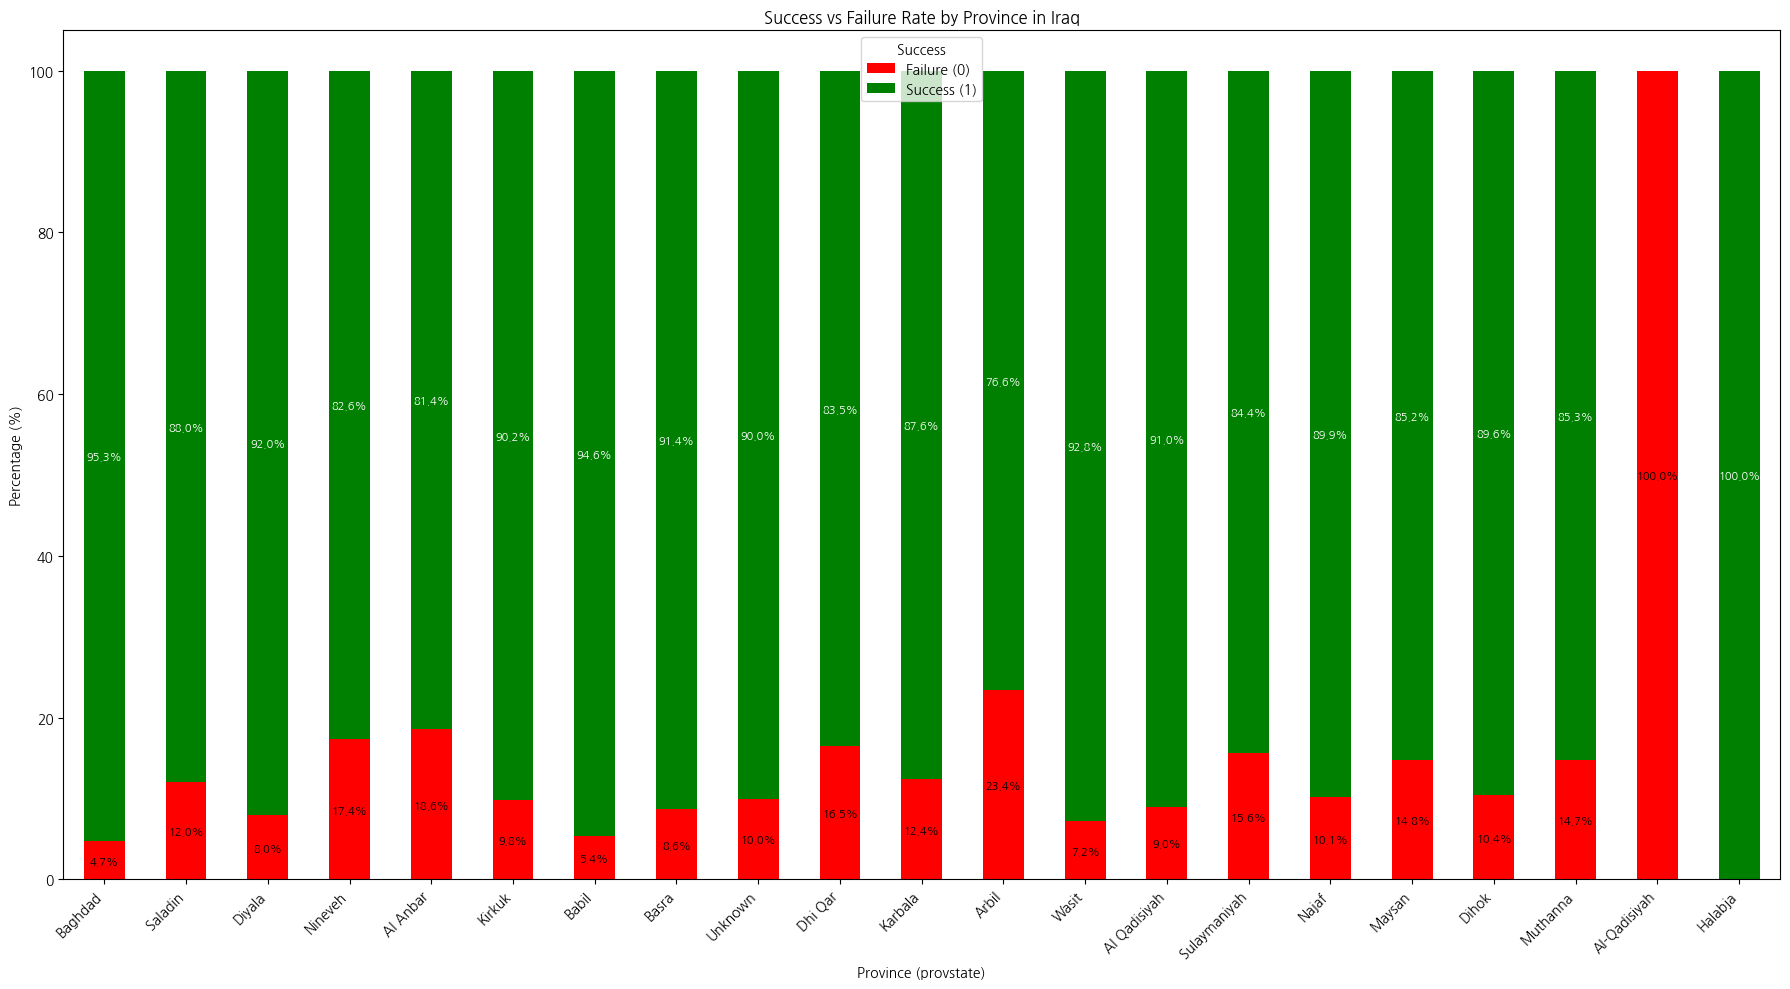

In [66]:
# 타겟 → 지역 기준으로 변경
prov_success = iraq_df.groupby(['provstate', 'success']).size().reset_index(name='count')

# 비율 계산
total_per_prov = prov_success.groupby('provstate')['count'].transform('sum')
prov_success['rate'] = prov_success['count'] / total_per_prov * 100

# 피벗 (비율용)
pivot_rate = prov_success.pivot(index='provstate', columns='success', values='rate').fillna(0)

# 정렬: 총 사건 수 기준 내림차순
total_counts = prov_success.groupby('provstate')['count'].sum()
sorted_index = total_counts.sort_values(ascending=False).index
pivot_rate = pivot_rate.loc[sorted_index]

# 시각화
ax = pivot_rate.plot(kind='bar', stacked=True, figsize=(18, 10), color=['red', 'green'])

plt.title("Success vs Failure Rate by Province in Iraq")
plt.ylabel("Percentage (%)")
plt.xlabel("Province (provstate)")
plt.legend(title='Success', labels=['Failure (0)', 'Success (1)'])
plt.xticks(rotation=45, ha='right')

# 수치 라벨
for i, (idx, row) in enumerate(pivot_rate.iterrows()):
    fail_pct = row.get(0, 0)
    succ_pct = row.get(1, 0)

    if fail_pct > 1:
        ax.text(i, fail_pct / 2, f"{fail_pct:.1f}%", ha='center', va='center', color='black', fontsize=8)
    if succ_pct > 1:
        ax.text(i, fail_pct + succ_pct / 2, f"{succ_pct:.1f}%", ha='center', va='center', color='white', fontsize=8)

plt.tight_layout()
plt.show()


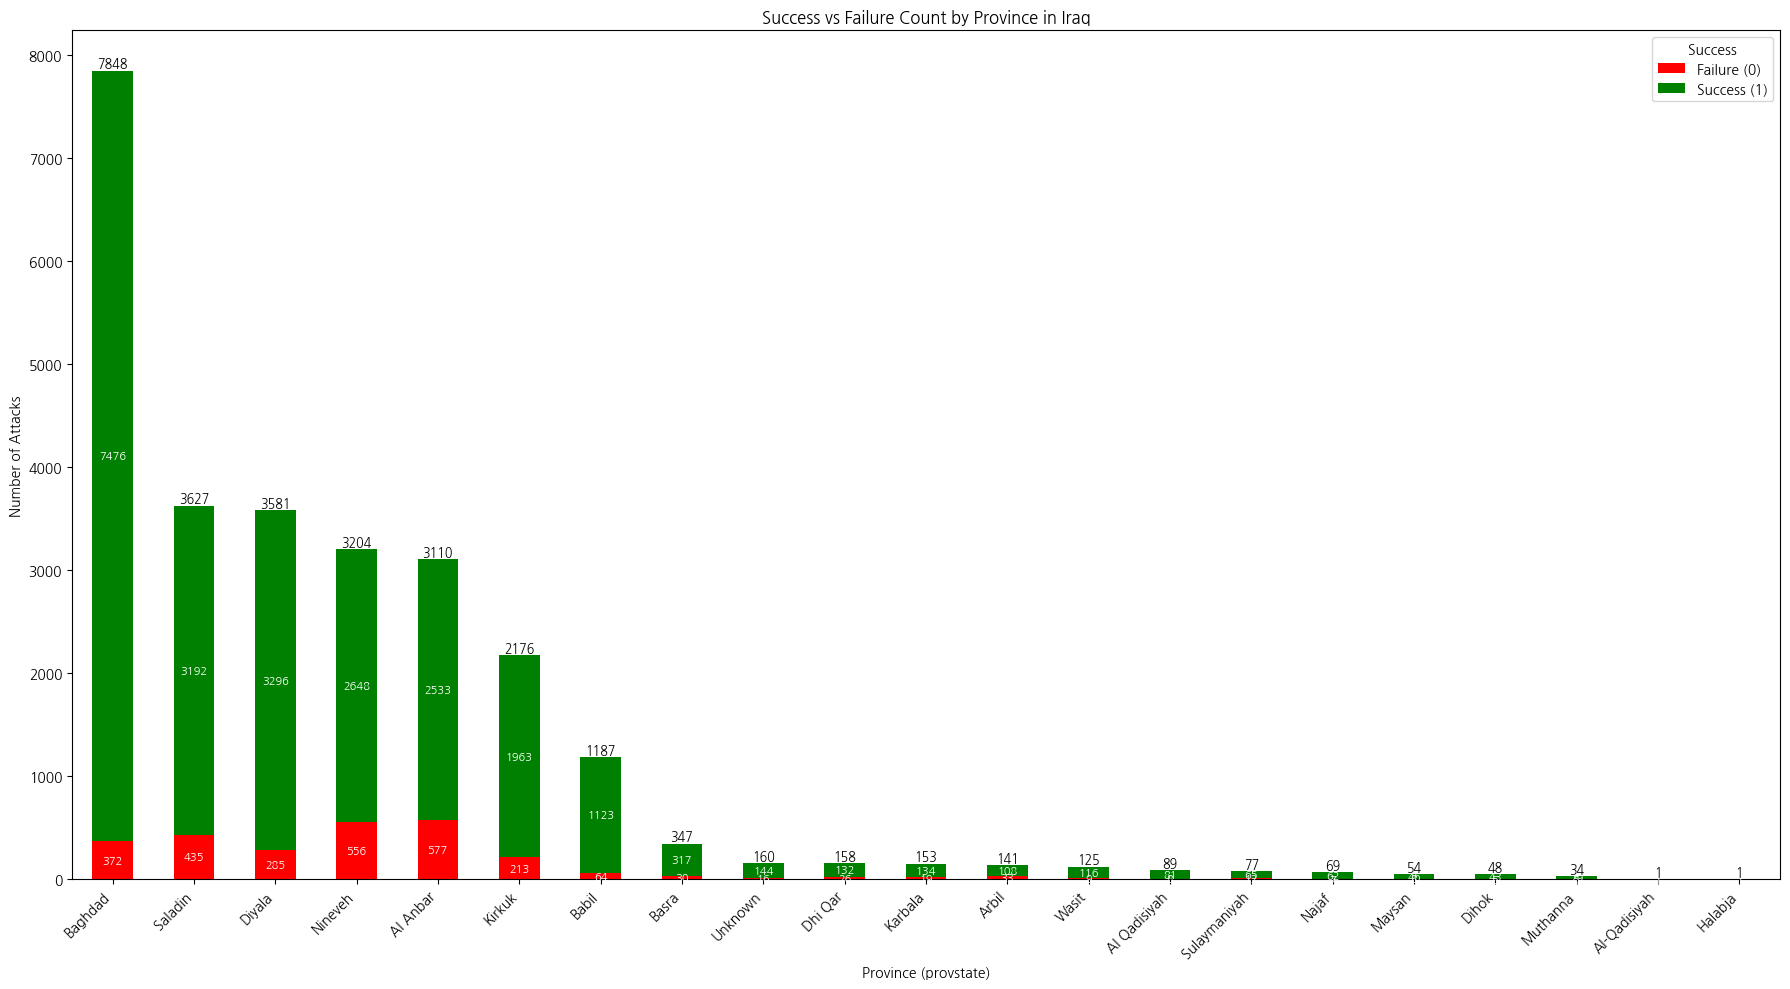

In [67]:
# 피벗 (건수 기준)
pivot_count = prov_success.pivot(index='provstate', columns='success', values='count').fillna(0)

# 정렬: 총 건수 기준 내림차순
pivot_count['total'] = pivot_count.sum(axis=1)
pivot_count = pivot_count.sort_values(by='total', ascending=False).drop(columns='total')

# 시각화
ax = pivot_count.plot(kind='bar', stacked=True, figsize=(18, 10), color=['red', 'green'])

plt.title("Success vs Failure Count by Province in Iraq")
plt.ylabel("Number of Attacks")
plt.xlabel("Province (provstate)")
plt.legend(title='Success', labels=['Failure (0)', 'Success (1)'])
plt.xticks(rotation=45, ha='right')

# 수치 라벨
for i, (idx, row) in enumerate(pivot_count.iterrows()):
    fail = row.get(0, 0)
    succ = row.get(1, 0)
    total = fail + succ

    if fail > 0:
        ax.text(i, fail / 2, str(int(fail)), ha='center', va='center', color='white', fontsize=8)
    if succ > 0:
        ax.text(i, fail + succ / 2, str(int(succ)), ha='center', va='center', color='white', fontsize=8)

    ax.text(i, total + 3, f"{int(total)}", ha='center', va='bottom', color='black', fontsize=9)

plt.tight_layout()
plt.show()


## **이라크 테러 성공 건수가 높은 조합**

In [68]:
# 1. 이라크 데이터만 추출
iraq_df = df_1990[df_1990['country_txt'] == 'Iraq']
iraq_copy = iraq_df.copy()

# 2. 필요한 변수 추출
iraq_copy = iraq_copy[['attacktype1_txt', 'targtype1_txt', 'provstate', 'success']]

# 3. 조합 그룹 만들기
iraq_copy['combination'] = iraq_copy['attacktype1_txt'] + ' + ' + iraq_copy['targtype1_txt'] + ' + ' + iraq_copy['provstate']

# 4. 성공률 계산
grouped = iraq_copy.groupby('combination')['success'].agg(['count', 'sum']).reset_index()
grouped['success_rate'] = (grouped['sum'] / grouped['count']) * 100

# 상위 조합 추출 (데이터 수 10개 이상)
filtered = grouped[grouped['count'] >= 10]

# count 기준으로 정렬 (내림차순), 상위 50개 추출
top_combos = filtered.sort_values(by='sum', ascending=False).head(20)
top_combos

,combination,count,sum,success_rate
477,Bombing/Explosion + Private Citizens & Propert...,3139,3118,99.330997
482,Bombing/Explosion + Private Citizens & Propert...,1180,1160,98.305085
331,Bombing/Explosion + Business + Baghdad,1137,1128,99.208443
490,Bombing/Explosion + Private Citizens & Propert...,743,726,97.711978
472,Bombing/Explosion + Private Citizens & Propert...,586,555,94.709898
412,Bombing/Explosion + Military + Al Anbar,604,509,84.271523
488,Bombing/Explosion + Private Citizens & Propert...,546,500,91.575092
456,Bombing/Explosion + Police + Baghdad,501,497,99.201597
476,Bombing/Explosion + Private Citizens & Propert...,487,477,97.946612
433,Bombing/Explosion + Military + Saladin,500,459,91.800000


<ipython-input-69-d5c1125136cd>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




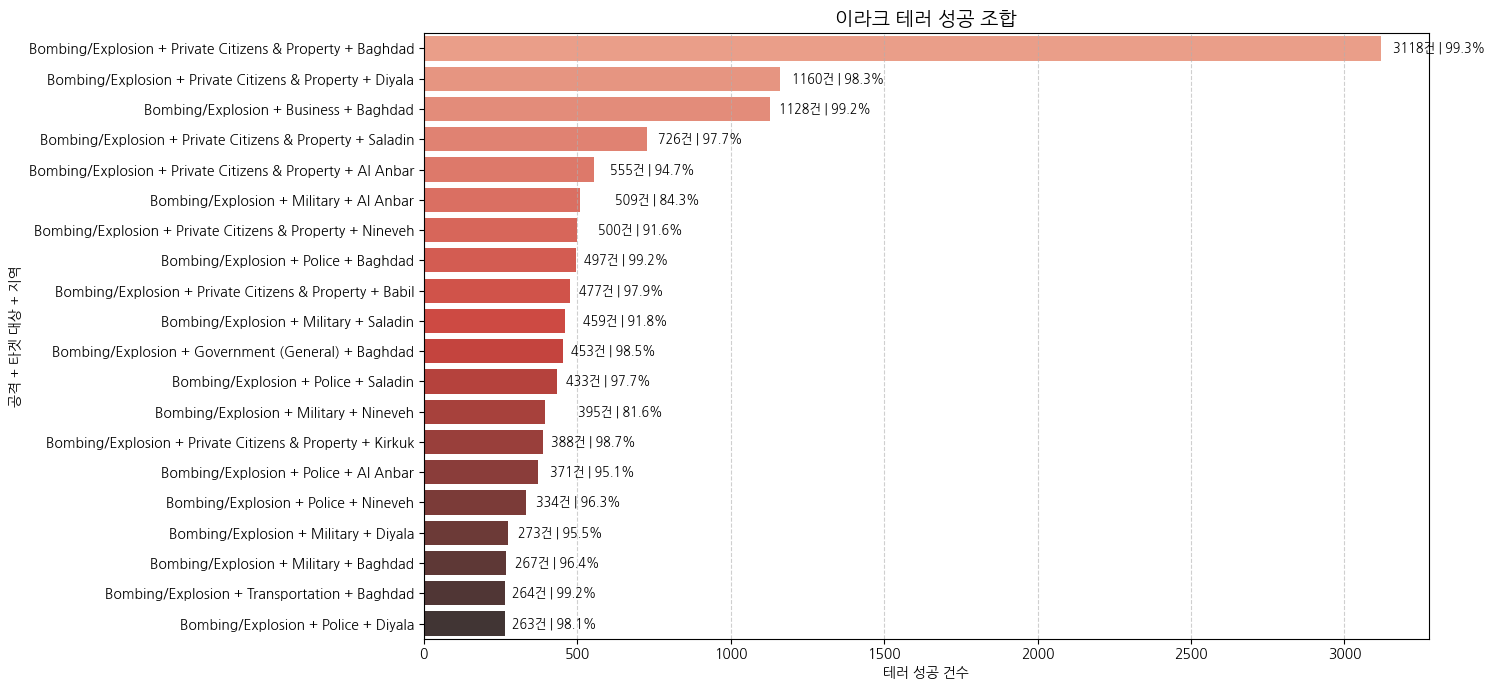

In [69]:
# 시각화
plt.figure(figsize=(15, 7))
sns.barplot(
    data=top_combos,
    y='combination',
    x='sum',
    palette='Reds_d'
)
plt.title('이라크 테러 성공 조합', fontsize=14)
plt.xlabel('테러 성공 건수')
plt.ylabel('공격 + 타겟 대상 + 지역')
plt.grid(axis='x', linestyle='--', alpha=0.6)

# 수치 라벨 표시 (성공건수 + 성공률 둘 다)
for i, row in enumerate(top_combos.itertuples()):
    label = f"{int(row.sum)}건 | {row.success_rate:.1f}%"
    plt.text(row.count + 20, i, label, va='center', ha='left', fontsize=9)

plt.tight_layout()
plt.show()


## **4개국 포지셔닝맵**

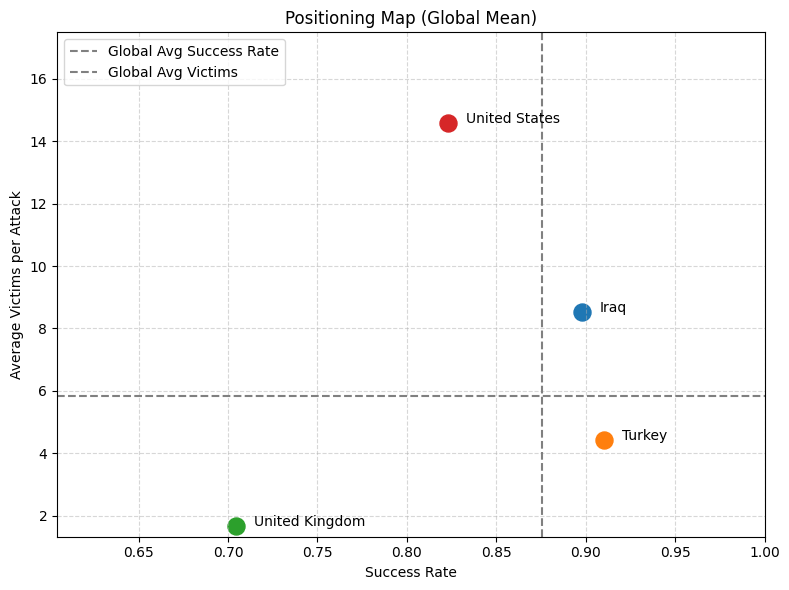

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 대상 국가
target_countries = ['Iraq', 'Turkey', 'United Kingdom', 'United States']
df_filtered = df_1990[df_1990['country_txt'].isin(target_countries)]

# 전체 기준으로 피해 규모 컬럼 생성
df_1990['total_victim'] = df_1990['nkill'].fillna(0) + df_1990['nwound'].fillna(0)

# 전체 평균 기준
global_avg_success = df_1990['success'].mean()
global_avg_victims = df_1990['total_victim'].mean()

# 4개국 평균
summary = df_filtered.groupby('country_txt').agg(
    success_rate=('success', 'mean'),
    avg_victims=('total_victim', 'mean')
).loc[target_countries]

# 동적 축 범위 계산 (여유를 위해 ±10~20% 여백 추가)
x_min = max(0, summary['success_rate'].min() - 0.1)
x_max = min(1, summary['success_rate'].max() + 0.1)
y_min = max(0, summary['avg_victims'].min() * 0.8)
y_max = summary['avg_victims'].max() * 1.2

# 시각화
plt.figure(figsize=(8, 6))
for country in target_countries:
    x = summary.loc[country, 'success_rate']
    y = summary.loc[country, 'avg_victims']
    plt.scatter(x, y, s=150)
    plt.text(x + 0.01, y, country, fontsize=10)

# 평균선 (전 세계 기준)
plt.axvline(global_avg_success, color='gray', linestyle='--', label='Global Avg Success Rate')
plt.axhline(global_avg_victims, color='gray', linestyle='--', label='Global Avg Victims')

# 축 범위 설정
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

# 레이블 및 스타일
plt.title('Positioning Map (Global Mean)')
plt.xlabel('Success Rate')
plt.ylabel('Average Victims per Attack')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()
